Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=21
num_BackTrack_Days=2

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
246                                           NaN             Timor-Leste   
247                                           NaN                    Togo   
248                                           NaN     Trinidad and Tobago   
249                                           NaN                 Tunisia   
250                                           NaN                  Turkey   
251                                           NaN           United States   
252                                           NaN                  Uganda   
253                                           NaN                 Ukraine   
254                                           NaN    United Arab Emirates   
255                                      Anguilla          United Kingdom   
256                                       Bermuda          United Kingdom   
257                        British Virgin Islands          United Kingdom   
258                                Cayman Islands          United Kingdom   
259                               Channel Islands          United Kingdom   
260                   Falkland Islands (Malvinas)          United Kingdom   
261                                     Gibraltar          United Kingdom   
262                                   Isle of Man          United Kingdom   
263                                    Montserrat          United Kingdom   
264  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
265                      Turks and Caicos Islands          United Kingdom   
266                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
252                                           NaN             Timor-Leste   
253                                           NaN                    Togo   
254                                           NaN     Trinidad and Tobago   
255                                           NaN                 Tunisia   
256                                           NaN                  Turkey   
257                                           NaN           United States   
258                                           NaN                  Uganda   
259                                           NaN                 Ukraine   
260                                           NaN    United Arab Emirates   
261                                      Anguilla          United Kingdom   
262                                       Bermuda          United Kingdom   
263                        British Virgin Islands          United Kingdom   
264                                Cayman Islands          United Kingdom   
265                               Channel Islands          United Kingdom   
266                   Falkland Islands (Malvinas)          United Kingdom   
267                                     Gibraltar          United Kingdom   
268                                   Isle of Man          United Kingdom   
269                                    Montserrat          United Kingdom   
270  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
271                      Turks and Caicos Islands          United Kingdom   
272                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/31/21  6/1/21  6/2/21  6/3/21  \
185        0        0        0        0  ...      419     419     419     419   
186        0        0        0        0  ...        0       0       0       0   
187        0        0        0        0  ...      463     463     464     464   
188        0        0        0        0  ...       18      18      18      18   
189        0        0        0        0  ...   223568  227840  228146  228362   
190        0        0        0        0  ...        0       0       0       0   
191        0        0        0        0  ...     6107    6114    6120    6125   
192        0        0        0        0  ...       32      33      33      33   
193        0        0        0        0  ...      276     286     286     301   
194        0        0        0        0  ...     1584    1585    1587    1587   

     6/4/21  6/5/21  6/6/21  6/7/21   Population                 region  
185     419     419     419     419       441,543             Malta_nan  
186       0       0       0       0           NaN  Marshall Islands_nan  
187     466     466     468     470     4,649,658        Mauritania_nan  
188      18      18      18      18           NaN         Mauritius_nan  
189  228568  228758  228804  228838   128,640,794            Mexico_nan  
190       0       0       0       0           NaN        Micronesia_nan  
191    6129    6132    6134    6137     4,035,942           Moldova_nan  
192      33      33      33      33        39,183            Monaco_nan  
193     307     307     313     318     3,278,290          Mongolia_nan  
194    1591    1591    1592    1594       622 500        Montenegro_nan  

[10 rows x 509 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN         Monaco  43.733300    7.41670   
176                               NaN       Mongolia  46.862500  103.84670   
177                               NaN     Montenegro  42.708678   19.37439   
178                               NaN        Morocco  31.791700   -7.09260   
179                               NaN     Mozambique -18.665700   35.52960   
180                               NaN        Namibia -22.957600   18.49040   
181                               NaN          Nepal  28.166700   84.25000   
182                             Aruba    Netherlands  12.521100  -69.96830   
183  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
184                           Curacao    Netherlands  12.169600  -68.99000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/31/21  \
175        0        0        0        0        0        0  ...     2467   
176        0        0        0        0        0        0  ...    50436   
177        0        0        0        0        0        0  ...    97207   
178        0        0        0        0        0        0  ...   507125   
179        0        0        0        0        0        0  ...    69525   
180        0        0        0        0        0        0  ...    50675   
181        0        0        0        0        0        0  ...   447446   
182        0        0        0        0        0        0  ...    10824   
183        0        0        0        0        0        0  ...     1579   
184        0        0        0        0        0        0  ...    12121   

     6/1/21  6/2/21  6/3/21  6/4/21  6/5/21  6/6/21  6/7/21   Population   \
175    2467    2467    2468    2469    2469    2469    2469        39,183   
176   51448   51448   52812   52812   53595   53780   54713     3,278,290   
177   97282   97351   97429   97484   97533   97578   97621       622 500   
178  507528  507838  508210  508570  508850  509083  509277    36,817,128   
179   69547   69555   69641   69652   69656   69662   69687    31,542,919   
180   50948   51048   51177   51821   51882   52032   52390     2,540,905   
181  454344  461563  467467  476130  484373  491009  497960    29,300,000   
182   10839   10845   10857   10866   10878   10886   10886       116,600   
183    1580    1580    1580    1580    1580    1580    1580        26,000   
184   12128   12128   12132   12136   12137   12137   12137       158,665   

                                           region  
175                                    Monaco_nan  
176                                  Mongolia_nan  
177                                Montenegro_nan  
178                                   Morocco_nan  
179                                Mozambique_nan  
180                                   Namibia_nan  
181                                     Nepal_nan  
182                             Netherlands_Aruba  
183  Netherlands_Bonaire, Sint Eustatius and Saba  
184                           Netherlands_Curacao  

[10 rows x 509 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/31/21   6/1/21   6/2/21  \
185        0        0        0        0  ...    30535    30543    30553   
186        0        0        0        0  ...        4        4        4   
187        0        0        0        0  ...    19547    19598    19650   
188        0        0        0        0  ...     1375     1399     1418   
189        0        0        0        0  ...  2413742  2420659  2423928   
190        0        0        0        0  ...        1        1        1   
191        0        0        0        0  ...   255186   255241   255285   
192        0        0        0        0  ...     2504     2506     2508   
193        0        0        0        0  ...    58439    60372    60372   
194        0        0        0        0  ...    99623    99652    99683   

      6/3/21   6/4/21   6/5/21   6/6/21   6/7/21   Population   \
185    30557    30559    30568    30571    30571       441,543   
186        4        4        4        4        4           NaN   
187    19695    19752    19785    19817    19853     4,649,658   
188     1421     1421     1421     1458     1458           NaN   
189  2426822  2429631  2431702  2433681  2434562   128,640,794   
190        1        1        1        1        1           NaN   
191   255354   255402   255432   255453   255501     4,035,942   
192     2508     2508     2508     2508     2508        39,183   
193    62585    63978    63978    66443    67710     3,278,290   
194    99717    99758    99791    99812    99834       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 509 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                           Romania  45.943200   24.966800   
221            NaN                            Russia  61.524010  105.318756   
222            NaN                            Rwanda  -1.940300   29.873900   
223            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
224            NaN                       Saint Lucia  13.909400  -60.978900   
225            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
226            NaN                             Samoa -13.759000 -172.104600   
227            NaN                        San Marino  43.942400   12.457800   
228            NaN             Sao Tome and Principe   0.186400    6.613100   
229            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/31/21  \
220        0        0        0        0        0        0  ...  1077737   
221        0        0        0        0        0        0  ...  5013512   
222        0        0        0        0        0        0  ...    26963   
223        0        0        0        0        0        0  ...       68   
224        0        0        0        0        0        0  ...     5067   
225        0        0        0        0        0        0  ...     2035   
226        0        0        0        0        0        0  ...        3   
227        0        0        0        0        0        0  ...     5090   
228        0        0        0        0        0        0  ...     2345   
229        0        0        0        0        0        0  ...   450436   

      6/1/21   6/2/21   6/3/21   6/4/21   6/5/21   6/6/21   6/7/21  \
220  1077978  1078142  1078338  1078563  1078742  1078863  1078952   
221  5022881  5031583  5040390  5049210  5058221  5067246  5076543   
222    27023    27064    27119    27162    27211    27245    27307   
223       73       73       75       78       83       83       83   
224     5072     5072     5102     5108     5108     5133     5138   
225     2044     2044     2044     2065     2068     2076     2076   
226        3        3        3        3        3        3        3   
227     5090     5090     5090     5090     5090     5090     5090   
228     2345     2347     2349     2353     2353     2353     2353   
229   451687   452956   454217   455418   456562   457546   458707   

      Population                                 region  
220    19,530,000                           Romania_nan  
221   144,500,000                            Russia_nan  
222    12,952,218                            Rwanda_nan  
223           NaN             Saint Kitts and Nevis_nan  
224       184,106                       Saint Lucia_nan  
225       110,940  Saint Vincent and the Grenadines_nan  
226           NaN                             Samoa_nan  
227        33,916                        San Marino_nan  
228           NaN             Sao Tome and Principe_nan  
229    34,695,447                      Saudi Arabia_nan  

[10 rows x 509 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

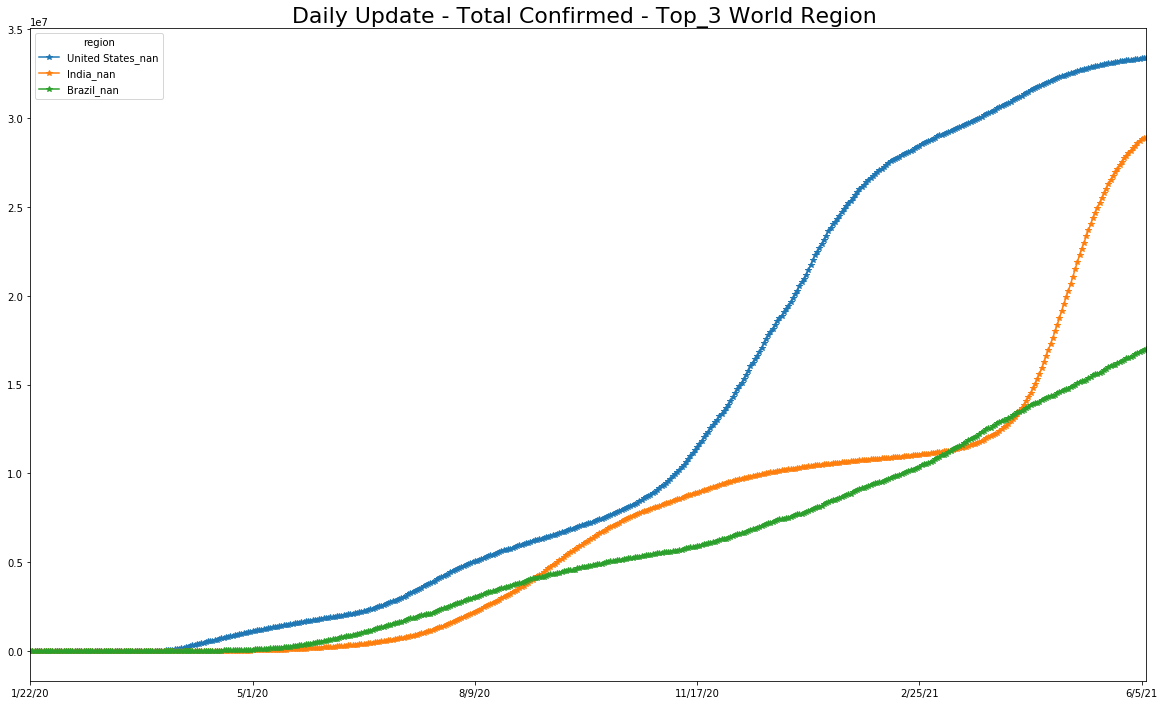

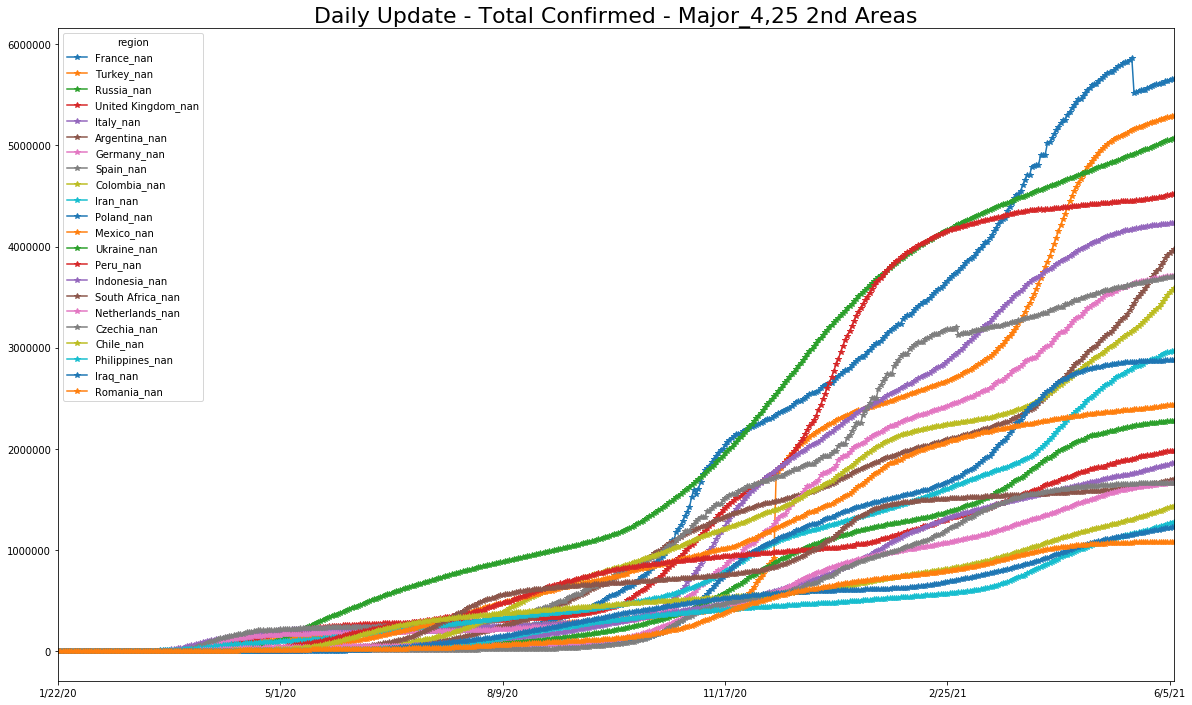

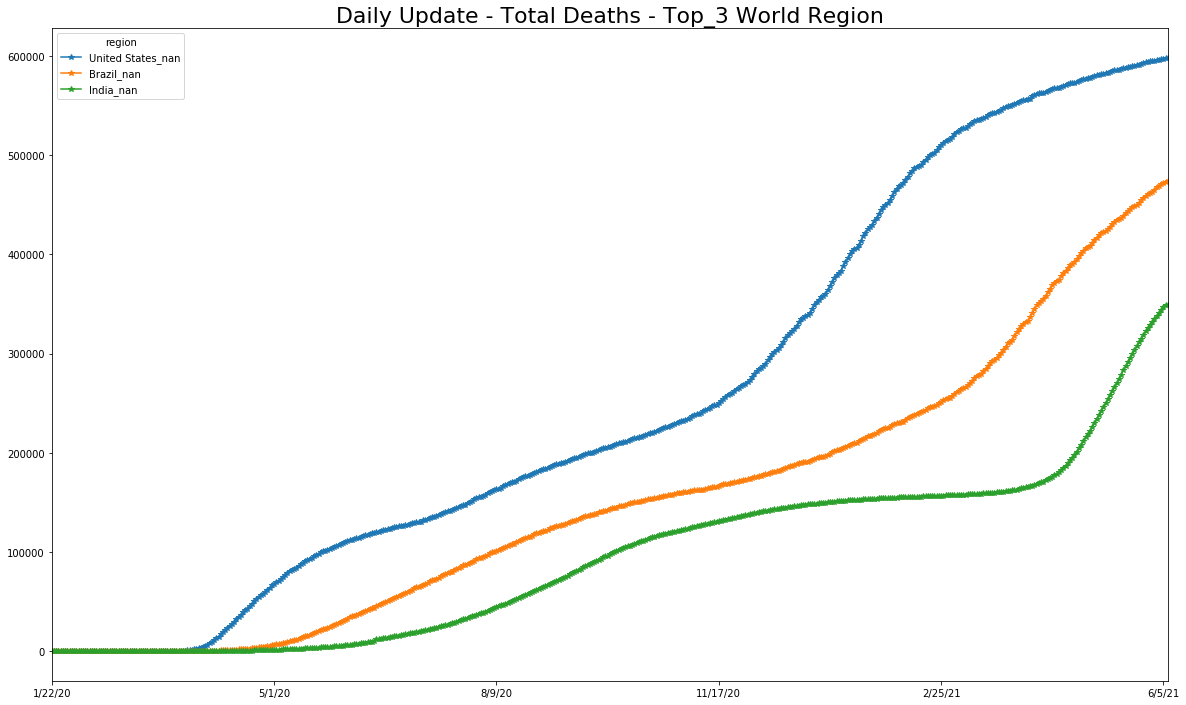

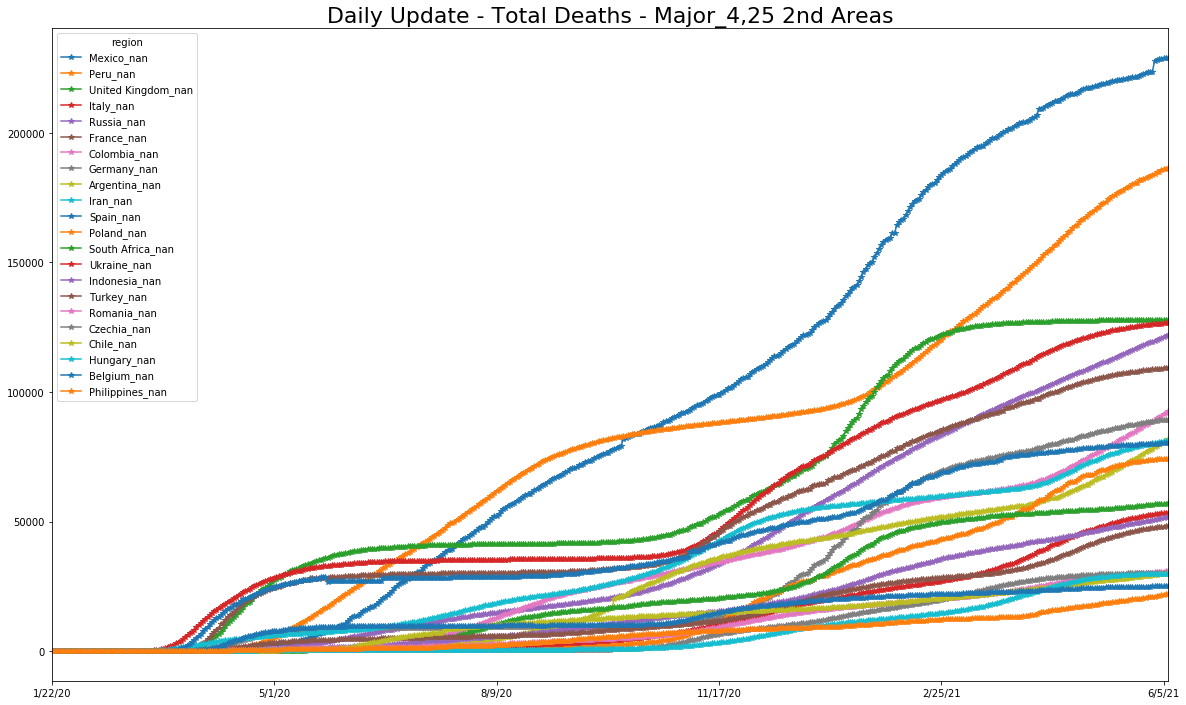

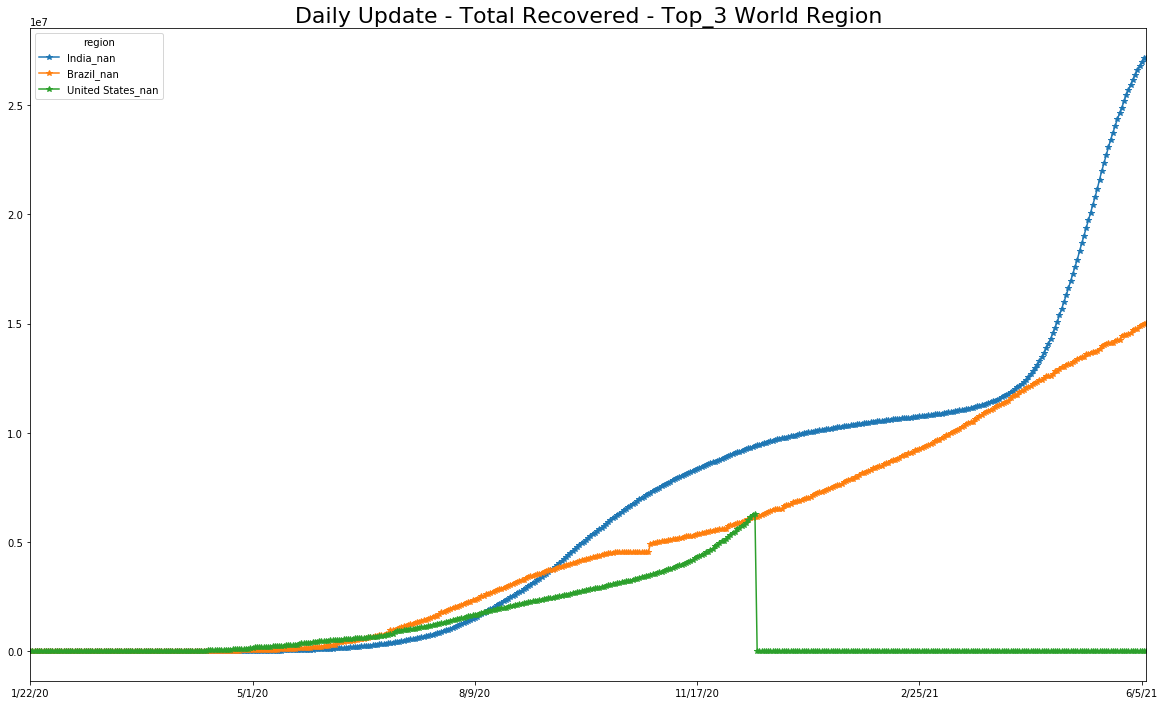

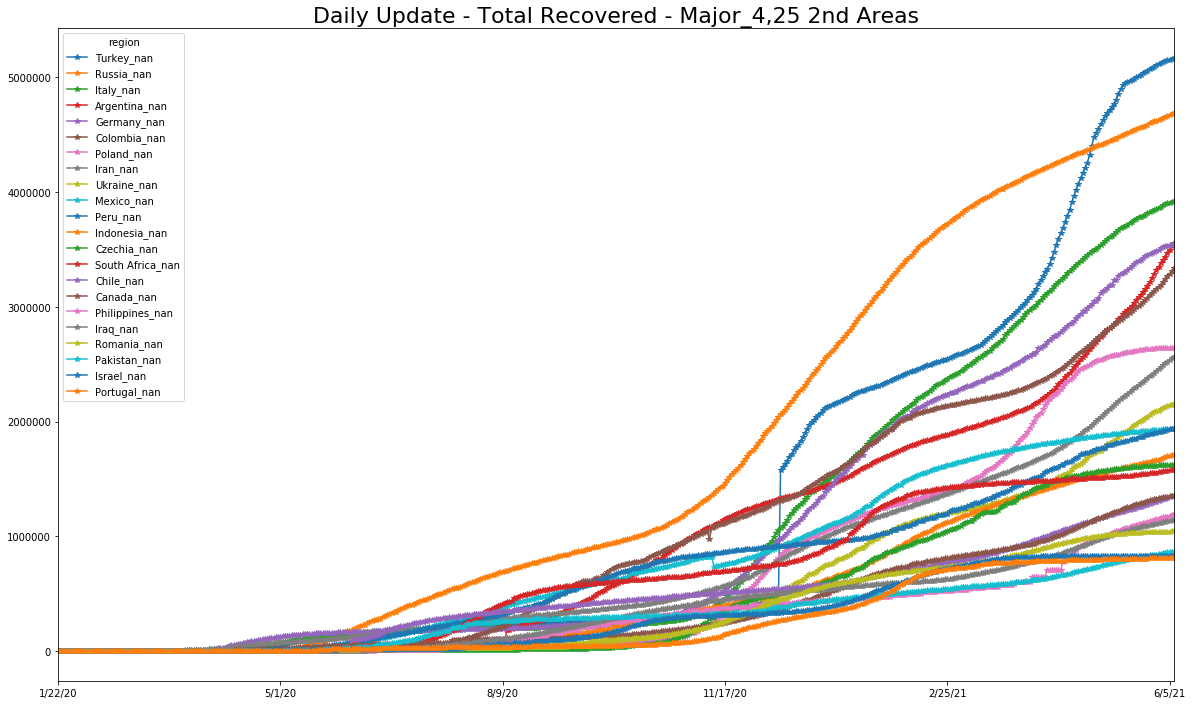

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/06/08


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6523005         1808           47287            0   
9/14/20  ...            6557428         1812           47836            0   
9/15/20  ...            6596920         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 276 columns]

In [25]:
ts[-4:]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/4/21            76628       132372       130361        13758       35307   
6/5/21            77963       132374       130681        13758       35594   
6/6/21            79224       132379       130958        13758       35772   
6/7/21            80841       132384       131283        13777       35854   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/4/21                     1263        3915397       223050   
6/5/21                     1263        3939024       223143   
6/6/21                     1263        3955439       223180   
6/7/21                     1263        3977634       223212   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
6/4/21                                     124                       5590   
6/5/21                                     124                       5595   
6/6/21                                     124                       5600   
6/7/21                                     124                       5605   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
6/4/21  ...           33343297       308490          101198            4   
6/5/21  ...           33357205       312703          101436            4   
6/6/21  ...           33362600       316535          101722            4   
6/7/21  ...           33377696       318783          101964            4   

region  Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
6/4/21         239252         8364                  309644       6773   
6/5/21         240714         8580                  309853       6780   
6/6/21         242138         8791                  310026       6787   
6/7/21         243621         9027                  310026       6812   

region  Zambia_nan  Zimbabwe_nan  
6/4/21       98376         39144  
6/5/21       99540         39168  
6/6/21      100278         39189  
6/7/21      100765         39238  

[4 rows x 276 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
75828 2021-05-10     Zimbabwe_nan      38433             5            21   
75829 2021-05-11     Zimbabwe_nan      38448            14            30   
75830 2021-05-12     Zimbabwe_nan      38466            15            34   
75831 2021-05-13     Zimbabwe_nan      38491            18            47   
75832 2021-05-14     Zimbabwe_nan      38535            25            58   
75833 2021-05-15     Zimbabwe_nan      38554            44            87   
75834 2021-05-16     Zimbabwe_nan      38560            19            88   
75835 2021-05-17     Zimbabwe_nan      38572             6            69   
75836 2021-05-18     Zimbabwe_nan      38595            12            37   
75837 2021-05-19     Zimbabwe_nan      38612            23            41   
75838 2021-05-20     Zimbabwe_nan      38635            17            52   
75839 2021-05-21     Zimbabwe_nan      38664            23            63   
75840 2021-05-22     Zimbabwe_nan      38679            29            69   
75841 2021-05-23     Zimbabwe_nan      38682            15            67   
75842 2021-05-24     Zimbabwe_nan      38696             3            47   
75843 2021-05-25     Zimbabwe_nan      38706            14            32   
75844 2021-05-26     Zimbabwe_nan      38819            10            27   
75845 2021-05-27     Zimbabwe_nan      38854           113           137   
75846 2021-05-28     Zimbabwe_nan      38918            35           158   
75847 2021-05-29     Zimbabwe_nan      38933            64           212   
75848 2021-05-30     Zimbabwe_nan      38944            15  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
75857 2021-06-08  Zimbabwe_nan          0            49            94   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
75857           277         100.125061         100.240165         100.710993   

       last_day  kalman_prediction  population  infected_rate  min  max  
75857     39238            39273.0    14862924       0.000026  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
75857 2021-06-08  Zimbabwe_nan          0            49            94   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
75857           277         100.125061         100.240165         100.710993   

       last_day  kalman_prediction  population  infected_rate  min  max  
75857     39238            39273.0    14862924       0.000026  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
74241  2021-06-06  Zimbabwe_nan      39189            24           137   
74242  2021-06-07  Zimbabwe_nan      39238            21            97   
74243  2021-06-08  Zimbabwe_nan          0            49            94   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
74241           235         100.061338         100.351029         100.603627   
74242           245         100.053641         100.248158         100.629134   
74243           277         100.125061         100.240165         100.710993   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
74241                39168  ...    14862924       0.000026  NaN  NaN   
74242                39189  ...    14862924       0.000026  NaN  NaN   
74243                39238  ...    14862924       0.000026  NaN  NaN   

       population_percentage : infected_rate confirmed  \
74241                                         0.002635   
74242                                         0.002637   
74243                                         0.002640   

       population_percentage : factor 9/10 infected_rate confirmed  \
74241                                           0.023718             
74242                                           0.023731             
74243                                           0.023761             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
74241                    38.0                           2.556697   
74242                    46.0                           3.094950   
74243                    35.0                           2.354853   

       delta : roling 7day AVG  \
74241                33.571429   
74242                35.000000   
74243                39.571429   

       delta : aprox 14-day case notification rate per 100k hab  
74241                                           3.162231         
74242                                           3.296794         
74243                                           3.727396         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
266  United States_nan  4.165793e+12  2.041027e+06  150013.723881


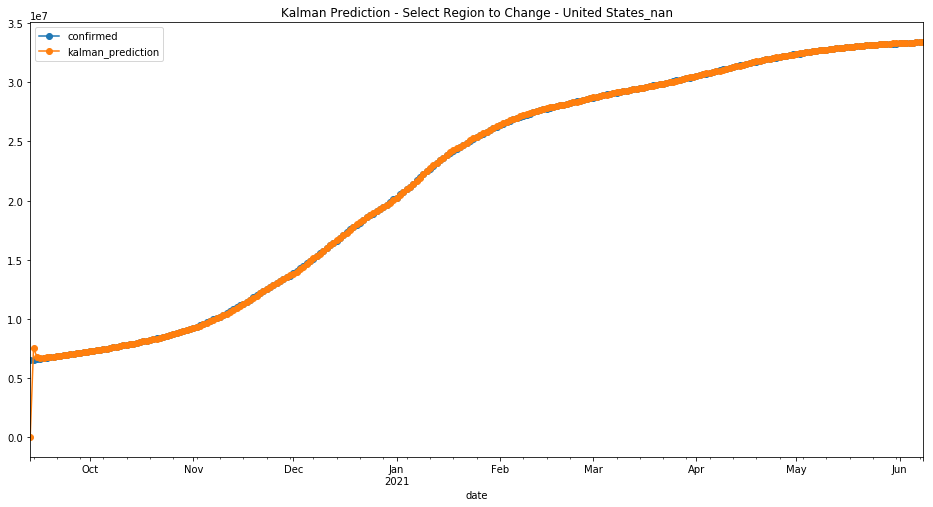

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
215  Russia_nan  9.660266e+10  310809.688718  21172.451493


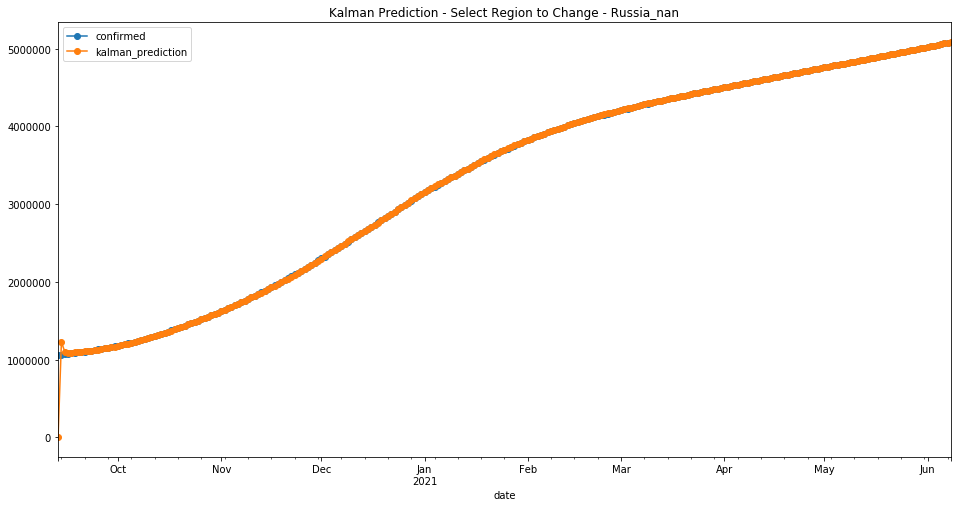

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  1.088558e+12  1.043340e+06  86394.003731


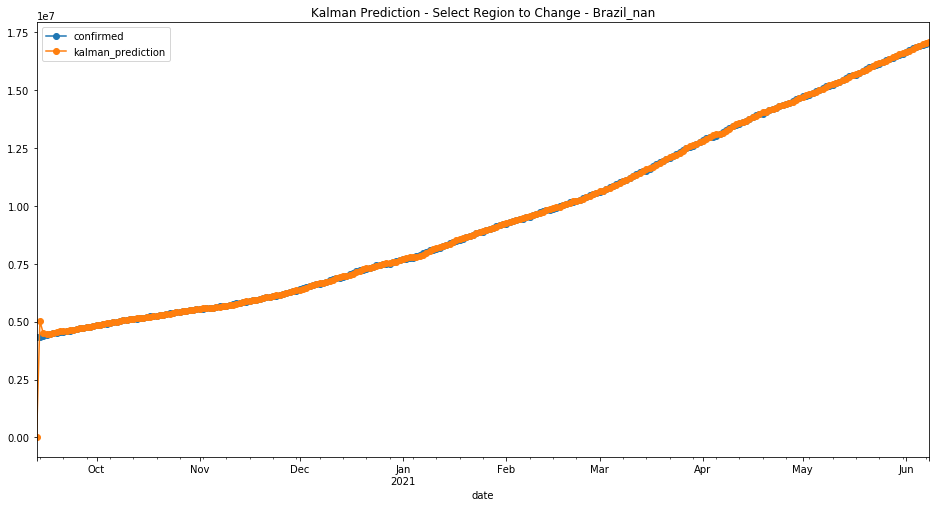

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse           mae
265  United Kingdom_nan  7.652221e+10  276626.48753  21272.350746


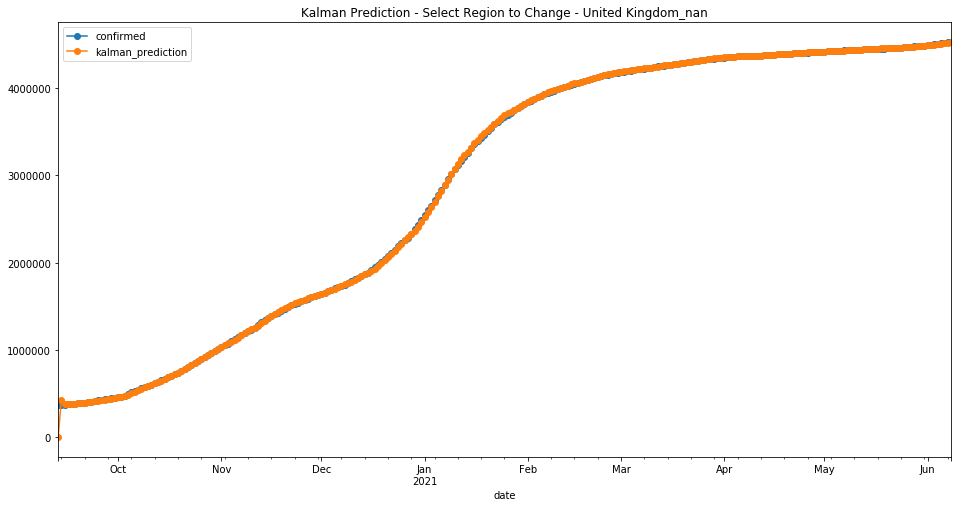

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpygfr34ap
  JVM stdout: /tmp/tmpygfr34ap/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpygfr34ap/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 7 months and 12 days !!!
H2O cluster name:           H2O_from_python_unknownUser_csw451
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-05-27
last_train_date= 2021-06-07
first_bootstrap_date= 2021-05-30
boost_bootstrap_date= 2021-06-04
first_test_date= 2021-05-29
last_test_date= 2021-06-08
first_valid_date= 2021-06-06


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    70738.0      70761 2021-05-30  Afghanistan_nan
1    71443.0      71838 2021-05-31  Afghanistan_nan
2    72584.0      72977 2021-06-01  Afghanistan_nan
3    73733.0      74026 2021-06-02  Afghanistan_nan
4    74890.0      75119 2021-06-03  Afghanistan_nan
5    76041.0      76628 2021-06-04  Afghanistan_nan
6    77591.0      77963 2021-06-05  Afghanistan_nan
7    78999.0      79224 2021-06-06  Afghanistan_nan
8    80351.0      80841 2021-06-07  Afghanistan_nan
9    82028.0          0 2021-06-08  Afghanistan_nan
10  132384.0     132309 2021-05-30      Albania_nan
11  132396.0     132315 2021-05-31      Albania_nan
12  132400.0     132337 2021-06-01      Albania_nan
13  132422.0     132351 2021-06-02      Albania_nan
14  132433.0     132360 2021-06-03      Albania_nan
15  132443.0     132372 2021-06-04      Albania_nan
16  132455.0     132374 2021-06-05      Albania_nan
17  132455.0     132379 2021-06-06      Albania_nan
18  132461.0     132384 2021-06-07      Albania_nan
19  132463.0          0 2021-06-08      Albania_nan
20  128795.0     128725 2021-05-30      Algeria_nan
21  129067.0     128913 2021-05-31      Algeria_nan
22  129251.0     129218 2021-06-01      Algeria_nan
23  129564.0     129640 2021-06-02      Algeria_nan
24  129982.0     129976 2021-06-03      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  334596.0     334539 2021-06-04  Azerbaijan_nan
176  334716.0     334647 2021-06-05  Azerbaijan_nan
177  334814.0     334715 2021-06-06  Azerbaijan_nan
178  334870.0     334747 2021-06-07  Azerbaijan_nan
179  334885.0          0 2021-06-08  Azerbaijan_nan
180   11839.0      11745 2021-05-30     Bahamas_nan
181   11909.0      11796 2021-05-31     Bahamas_nan
182   11902.0      11796 2021-06-01     Bahamas_nan
183   11951.0      11864 2021-06-02     Bahamas_nan
184   11946.0      11930 2021-06-03     Bahamas_nan
185   12008.0      11930 2021-06-04     Bahamas_nan
186   12091.0      11930 2021-06-05     Bahamas_nan
187   12087.0      11930 2021-06-06     Bahamas_nan
188   12070.0      12024 2021-06-07     Bahamas_nan
189   12061.0          0 2021-06-08     Bahamas_nan
190  238550.0     238156 2021-05-30     Bahrain_nan
191  240963.0     240531 2021-05-31     Bahrain_nan
192  243389.0     242790 2021-06-01     Bahrain_nan
193  245527.0     244726 2021-06-02     Bahrain_nan
194  247320.0     246658 2021-06-03     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   393783.0     393807 2021-05-30  Belarus_nan
221   395017.0     394439 2021-05-31  Belarus_nan
222   395508.0     395075 2021-06-01  Belarus_nan
223   396125.0     395990 2021-06-02  Belarus_nan
224   396983.0     396869 2021-06-03  Belarus_nan
225   397782.0     398052 2021-06-04  Belarus_nan
226   399005.0     398909 2021-06-05  Belarus_nan
227   399778.0     399852 2021-06-06  Belarus_nan
228   400792.0     400422 2021-06-07  Belarus_nan
229   401269.0          0 2021-06-08  Belarus_nan
230  1061691.0    1061200 2021-05-30  Belgium_nan
231  1063090.0    1062001 2021-05-31  Belgium_nan
232  1063714.0    1063499 2021-06-01  Belgium_nan
233  1065171.0    1065358 2021-06-02  Belgium_nan
234  1066905.0    1066957 2021-06-03  Belgium_nan
235  1068481.0    1068406 2021-06-04  Belgium_nan
236  1069940.0    1069874 2021-06-05  Belgium_nan
237  1071396.0    1070802 2021-06-06  Belgium_nan
238  1072193.0    1071271 2021-06-07  Belgium_nan
239  1072502.0          0 2021-06-08  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  3914905919.9410167
# MSE on the validation data =  21038500469923.0
# R^2 on the training data =  0.9998303301351547
# R^2 on the validation data =  0.44600775642637625


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1623129899157_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3914905919.9410167
RMSE: 62569.20904039795
MAE: 6818.121668489833
RMSLE: 0.1876640274214268
Mean Residual Deviance: 3914905919.9410167

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 21038500469923.0
RMSE: 4586774.517013345
MAE: 1212611.2712850962
RMSLE: 7.726671776175364
Mean Residual Deviance: 21038500469923.0
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-06-08 05:25:07  0.073 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-06-08 05:25:07  0.554 sec   1.0                164072.3607097948   27457.265067485256  26919739548.885017   4667597.994518235   1205127.274067578   21786471038430.656
     2021-06-08 05:25:07  0.758 sec   2.0                134093.66501178482  22367.805066233243  17981110996.292767   4671700.8425791105  1199153.388160465   21824788762554.375
     2021-06-08 05:25:08  1.085 sec   3.0                89754.61839592598   19377.816363293117  8055891523.3982935   4395727.492911735   1152333.4795628448  19322420191940.086
     2021-06-08 05:25:08  1.230 sec   4.0                182550.5719568248   20231.949152942896  33324711321.763874   4463018.026757748   1167085.9151171178  19918529907164.62
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-06-08 05:25:27  20.224 sec  286.0              65212.885196448544  7172.265032459561   4252720395.6451774   4573567.295307394   1210298.606882288   20917517804705.395
     2021-06-08 05:25:31  24.235 sec  357.0              63972.0611016921    6989.042160634618   4092424601.5986276   4584959.560749722   1211535.0822645966  21021854173710.277
     2021-06-08 05:25:35  28.275 sec  427.0              63176.88091561362   6926.623340572602   3991318282.225624    4584034.8126834     1211961.5287652316  21013375163893.33
     2021-06-08 05:25:39  32.277 sec  495.0              62329.92604326453   6814.773227096005   3885019680.5588264   4586090.913234377   1212776.037055049   21032229864450.92
     2021-06-08 05:25:39  32.934 sec  500.0              62569.20904039795   6818.121668489833   3914905919.9410167   4586774.517013345   1212611.2712850962  21038500469923.0


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  3.97358e+19            1                    0.379469
last_day           3.04744e+19            0.766925             0.291024
region             1.57641e+19            0.396724             0.150544
7_day_change       6.48489e+18            0.1632               0.0619294
3_day_change       5.31569e+18            0.133776             0.0507637
infected_rate      2.02669e+18            0.0510041            0.0193545
1_day_change       1.84526e+18            0.0464382            0.0176218
max                1.11914e+18            0.0281646            0.0106876
min                1.10911e+18            0.0279121            0.0105918
7_day_change_rate  4.22339e+17            0.0106287            0.00403325
3_day_change_rate  3.59836e+17            0.00905571           0.00343636
1_day_change_rate  5.70363e+16            0.00143539           0.000544685

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.973577e+19           1.000000    0.379469
1            last_day         3.047436e+19           0.766925    0.291024
2              region         1.576411e+19           0.396724    0.150544
3        7_day_change         6.484888e+18           0.163200    0.061929
4        3_day_change         5.315685e+18           0.133776    0.050764
5       infected_rate         2.026688e+18           0.051004    0.019354
6        1_day_change         1.845258e+18           0.046438    0.017622
7                 max         1.119142e+18           0.028165    0.010688
8                 min         1.109109e+18           0.027912    0.010592
9   7_day_change_rate         4.223391e+17           0.010629    0.004033
10  3_day_change_rate         3.598357e+17           0.009056    0.003436
11  1_day_change_rate         5.703632e+16           0.001435    0.000545

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


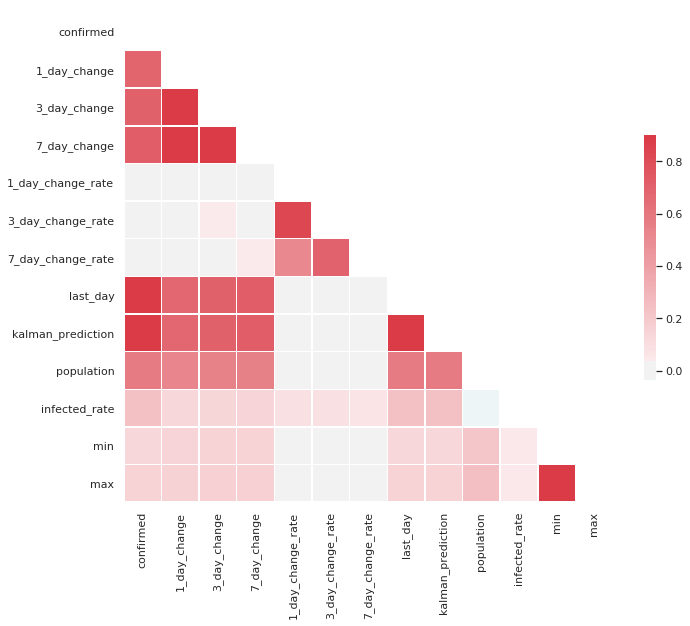

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.681854
3_day_change         0.708266
7_day_change         0.723974
1_day_change_rate    0.025603
3_day_change_rate    0.022958
7_day_change_rate    0.014934
last_day             0.994612
kalman_prediction    0.994821
population           0.578592
infected_rate        0.242020
min                  0.131653
max                  0.151783
Name: confirmed, dtype: float64


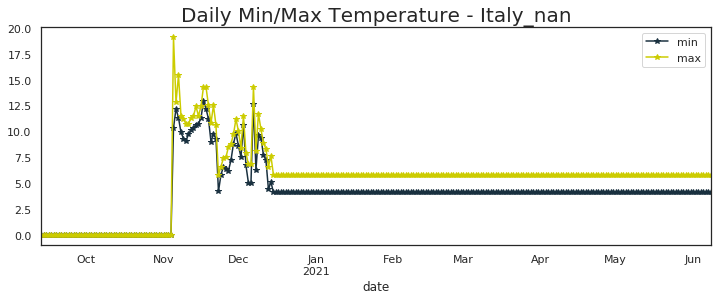

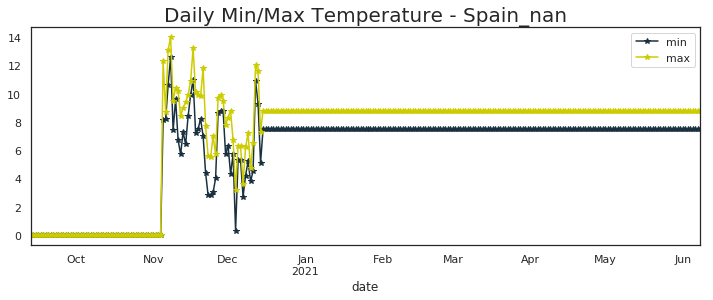

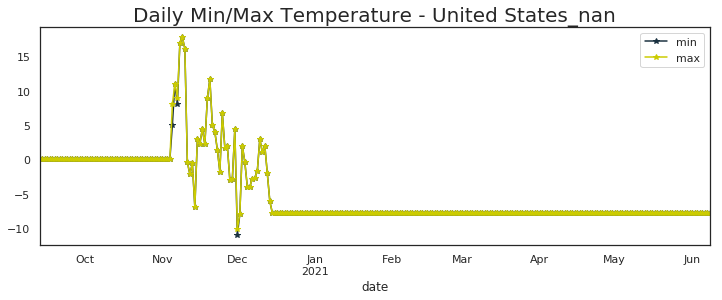

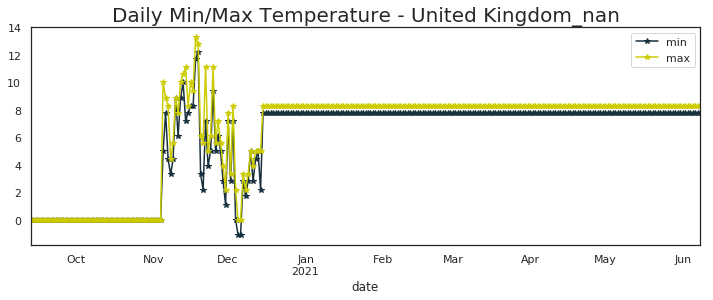

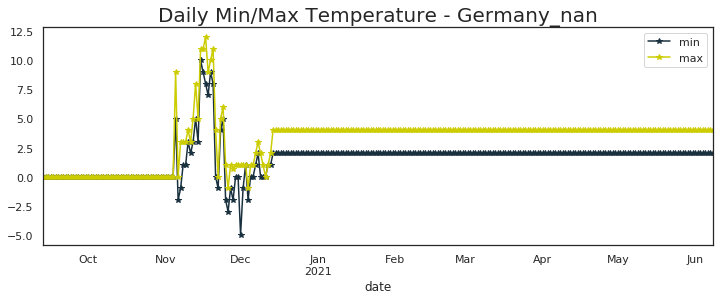

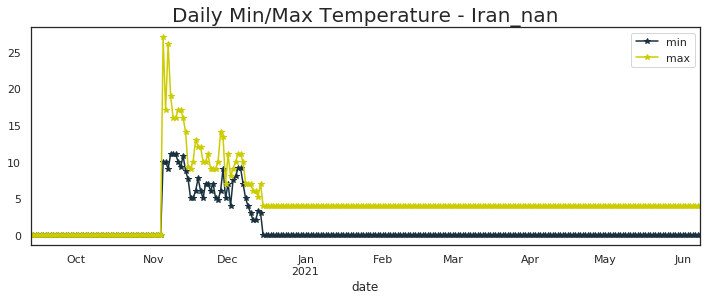

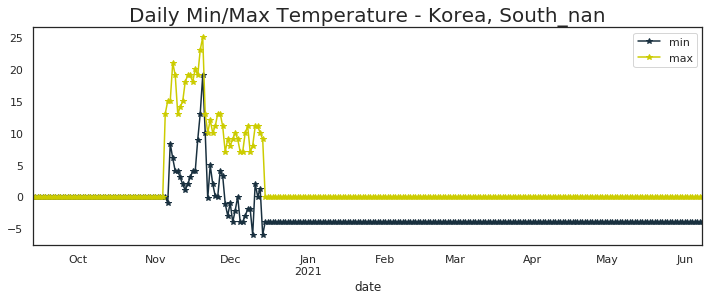

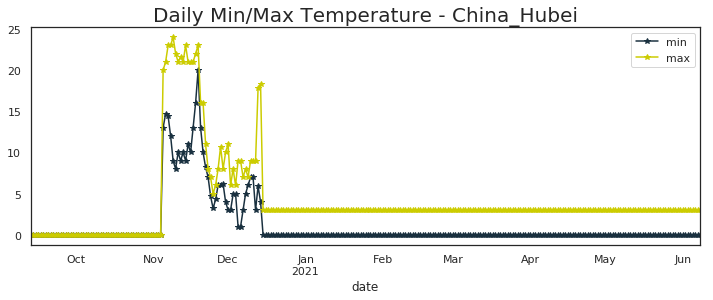

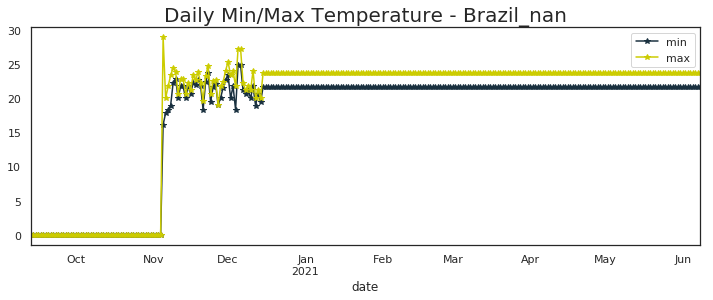

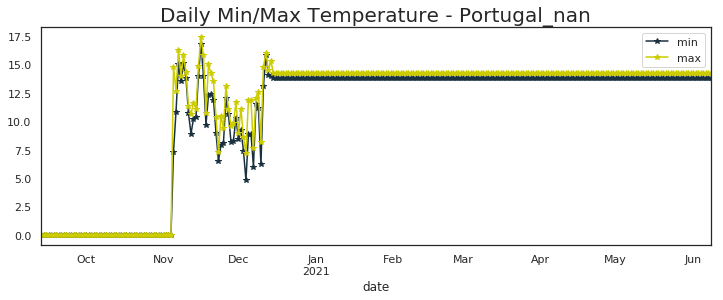

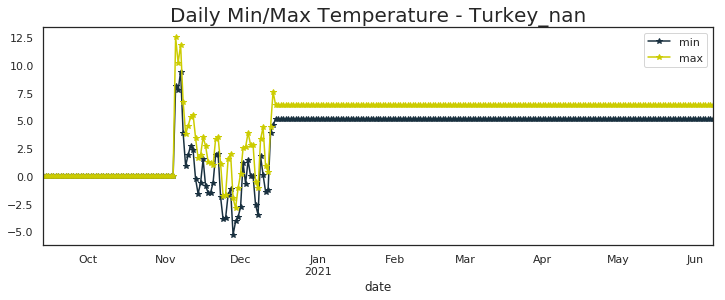

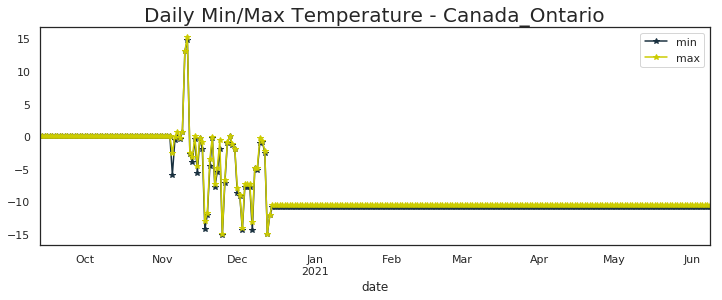

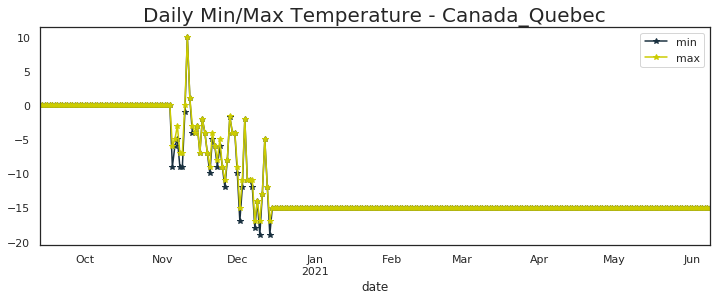

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Turkey_nan                   9.4  12.5
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Argentina_nan                0.0   0.0
Germany_nan                 10.0  12.0
Spain_nan                   12.6  14.0
Colombia_nan                 0.0   0.0
Iran_nan                    11.0  27.0
Poland_nan                   8.9  10.6
Mexico_nan                  15.1  15.1
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
South Africa_nan             0.0   0.0
Netherlands_nan             14.4  16.1
Czechia_nan                  0.0   0.0
Chile_nan                   18.0  22.0
Philippines_nan             

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

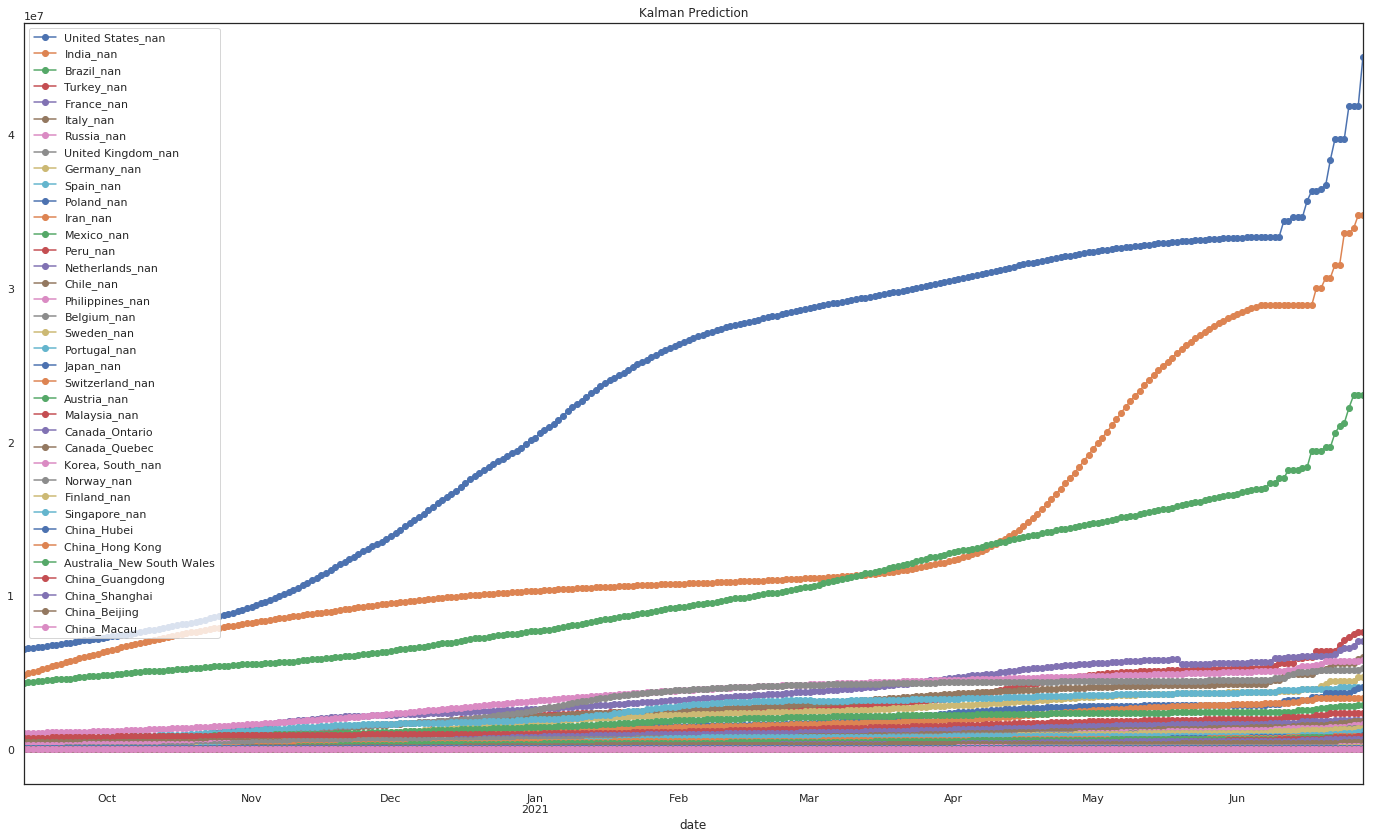

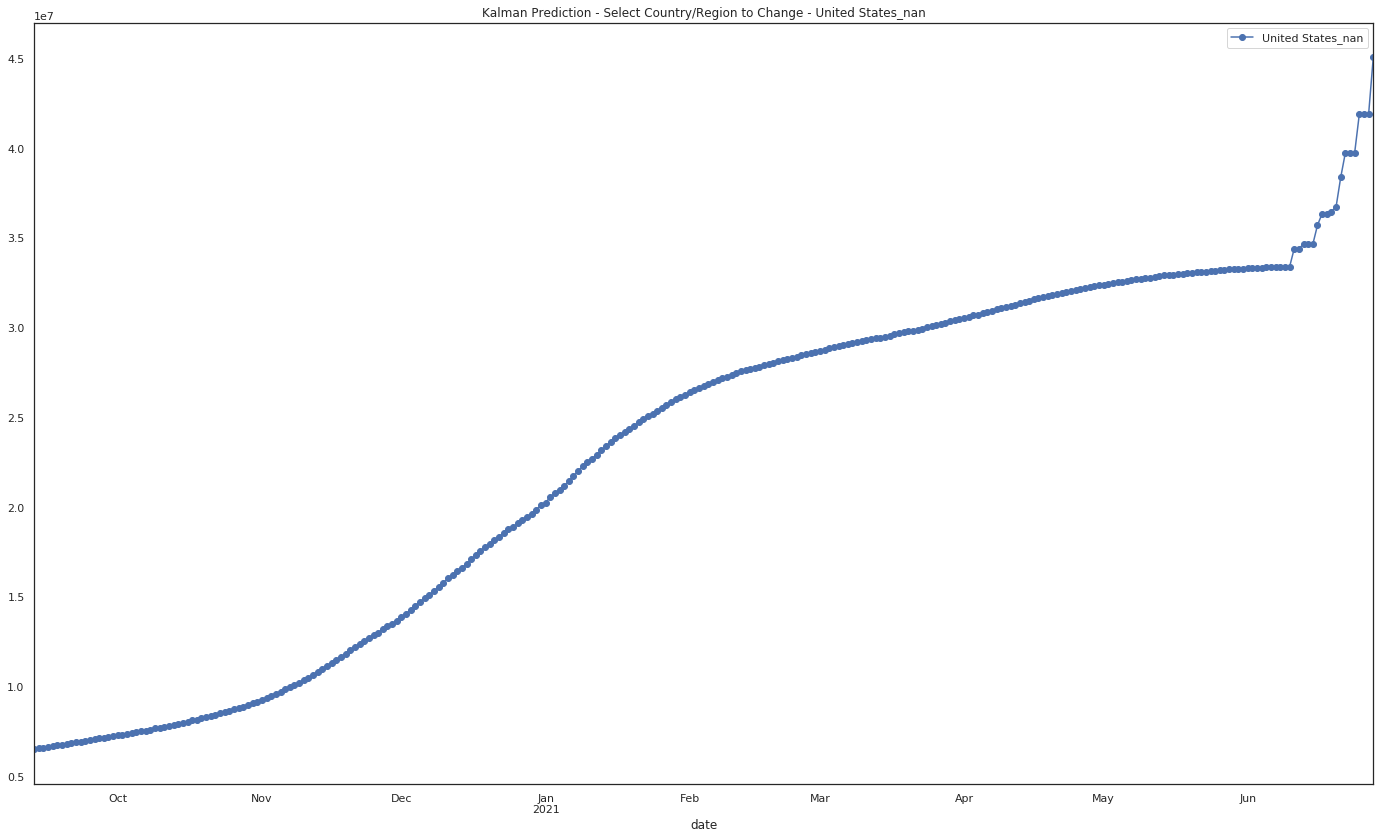

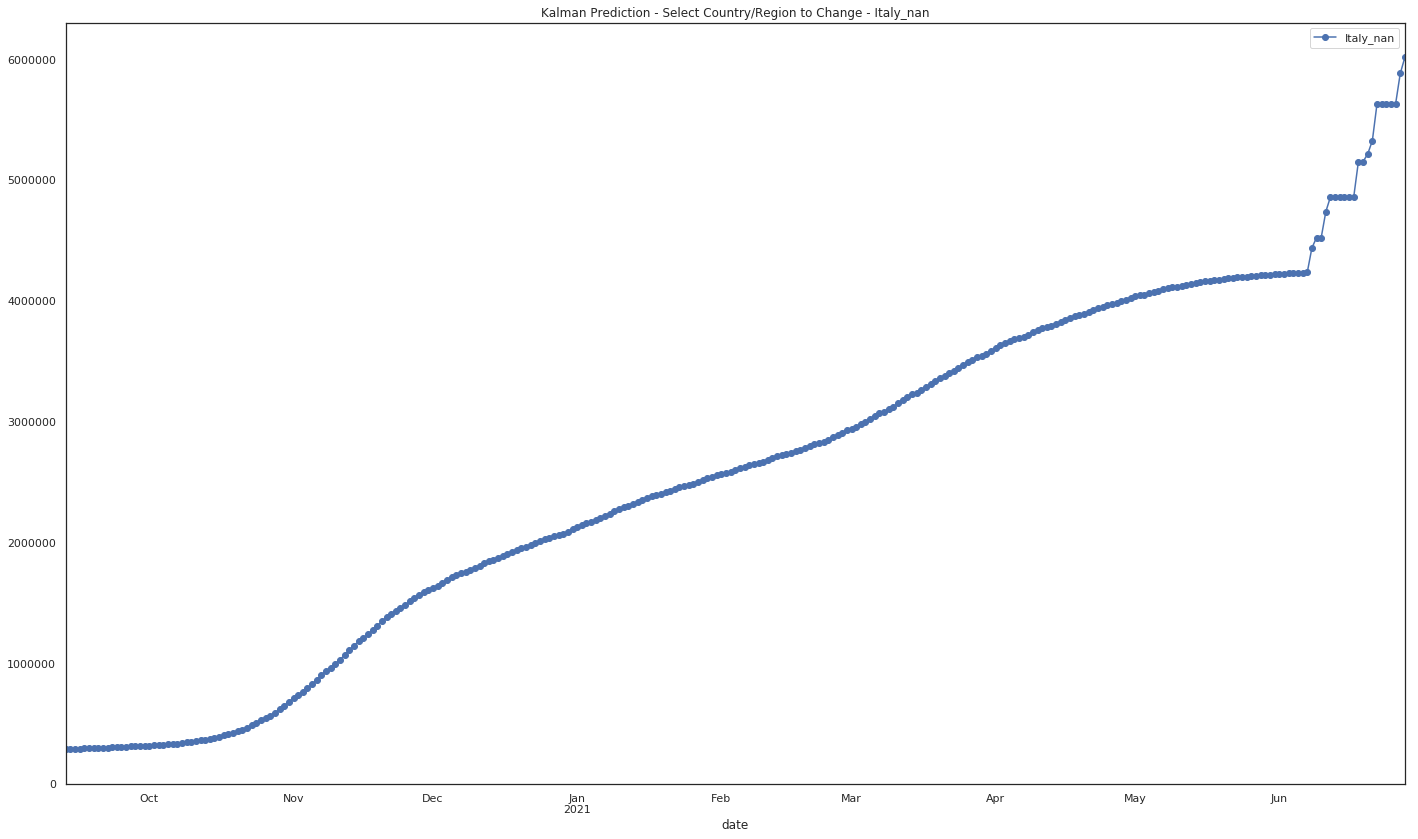

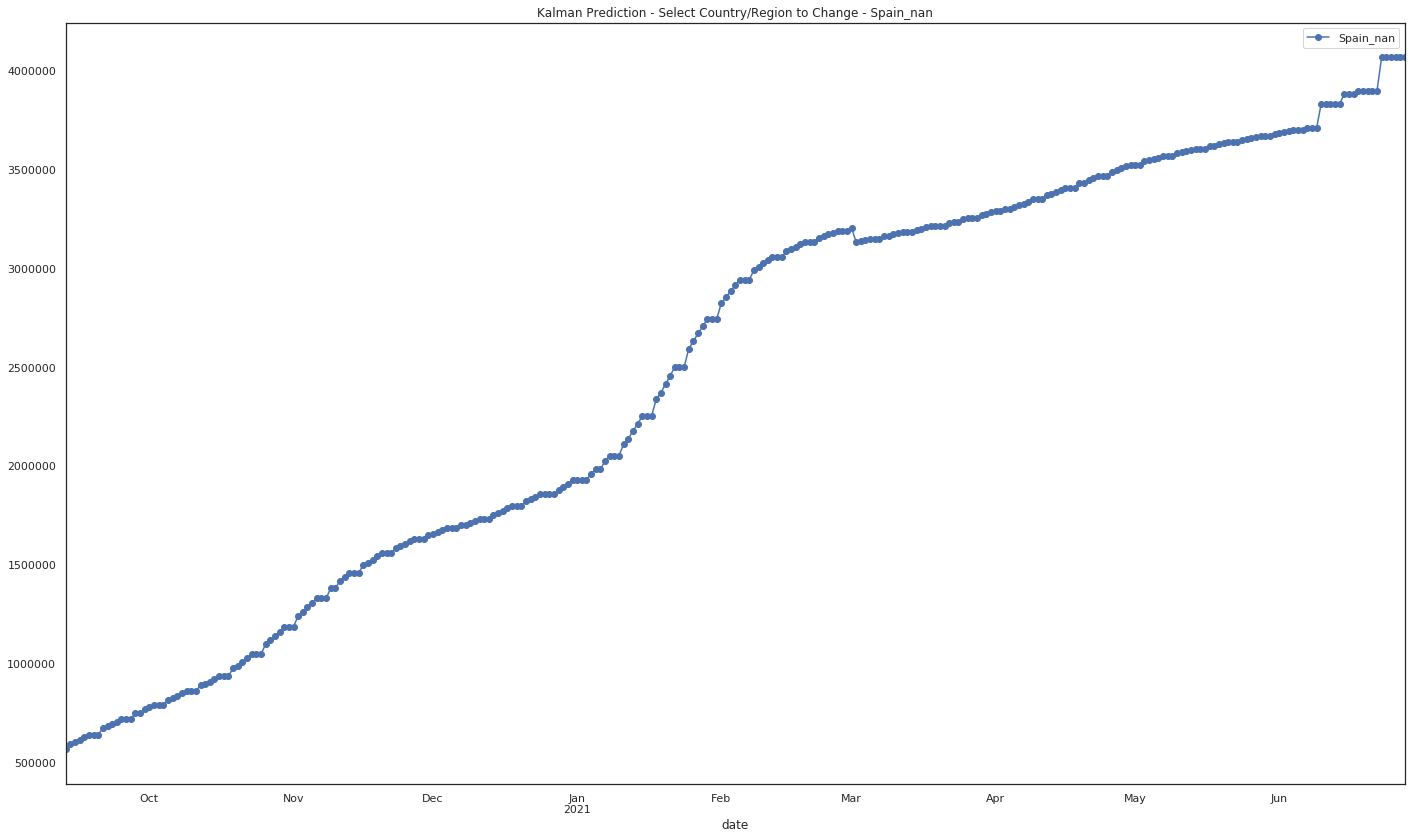

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


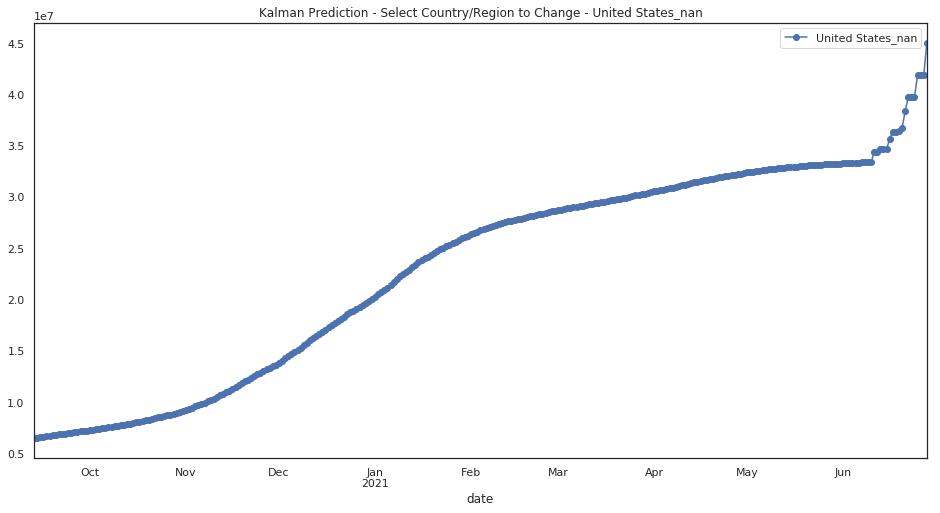

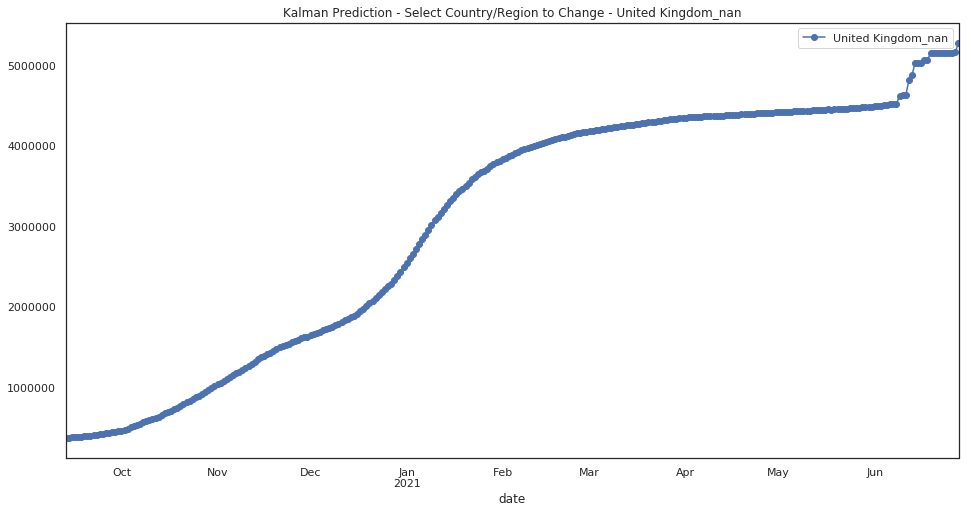

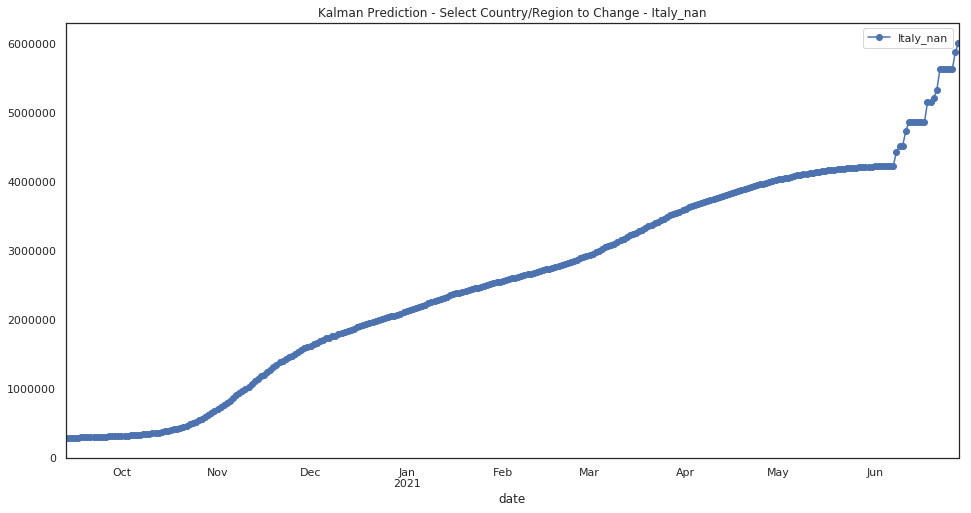

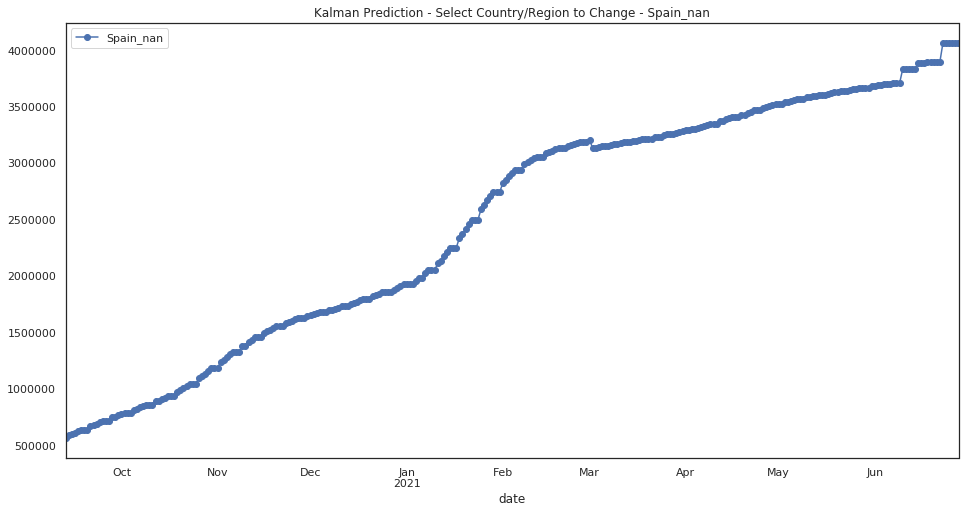

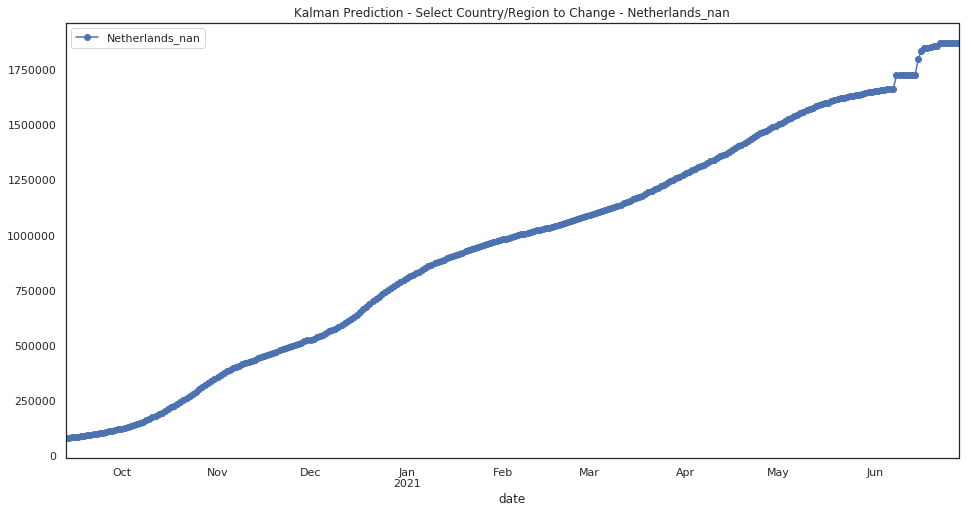

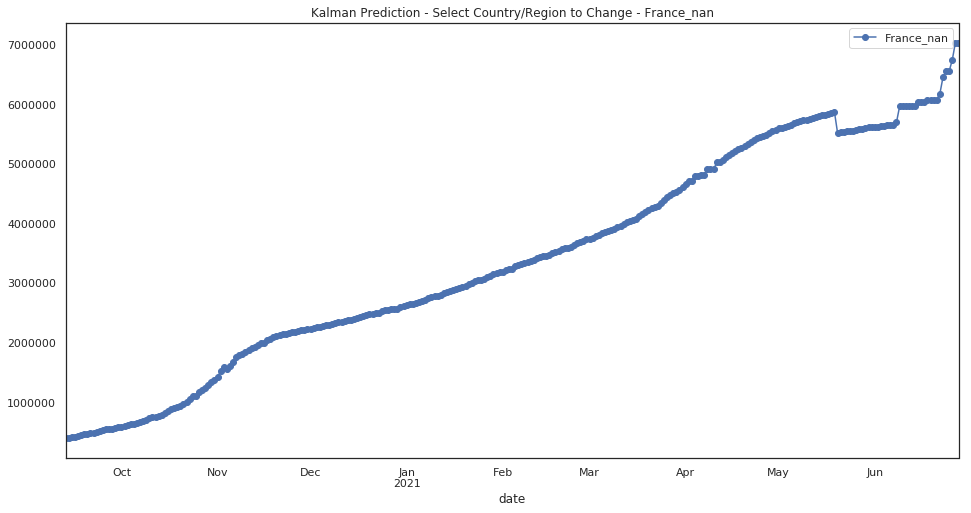

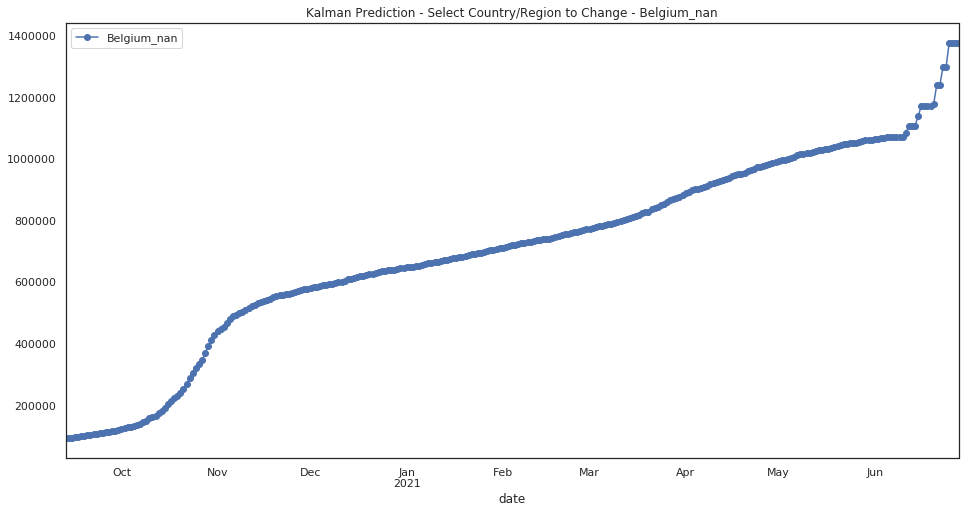

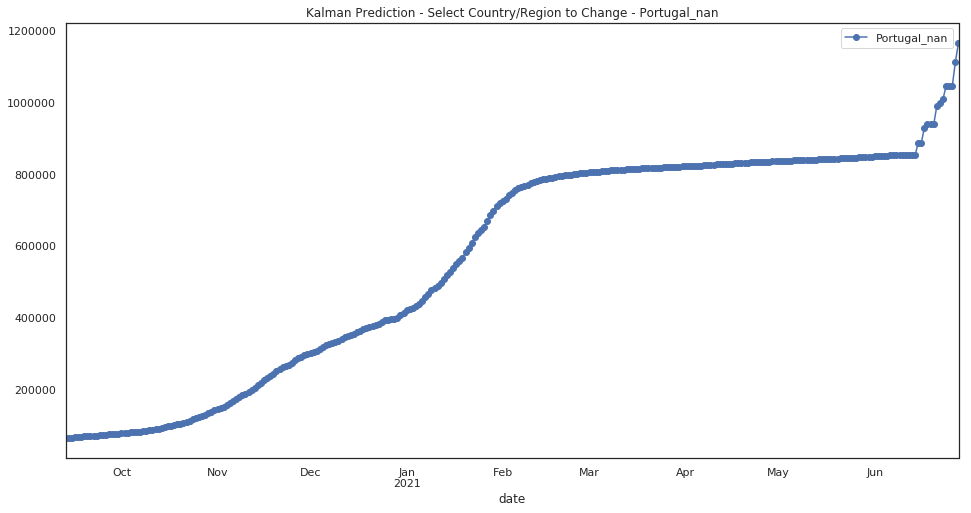

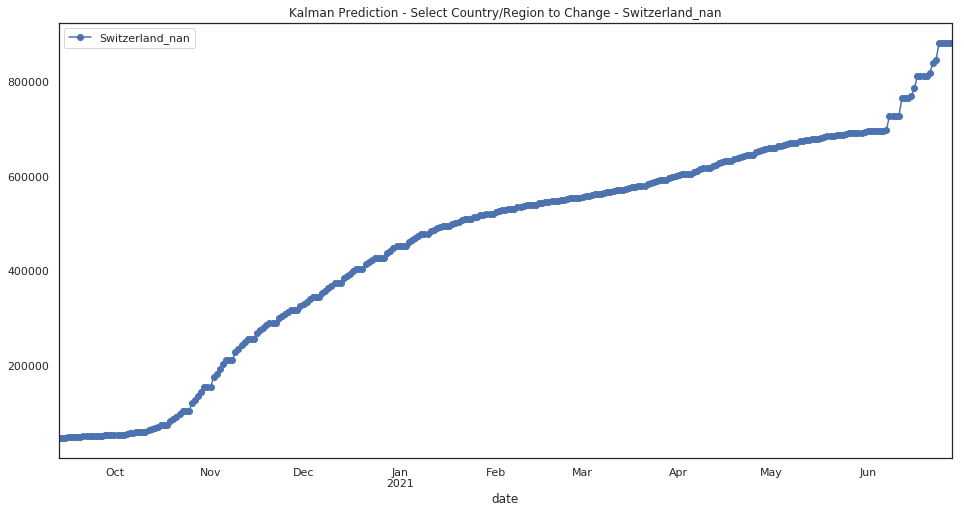

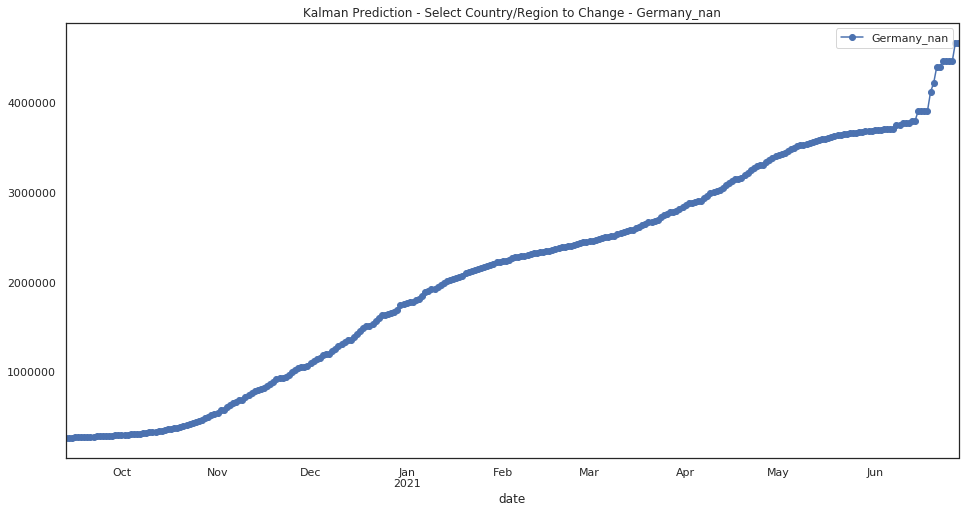

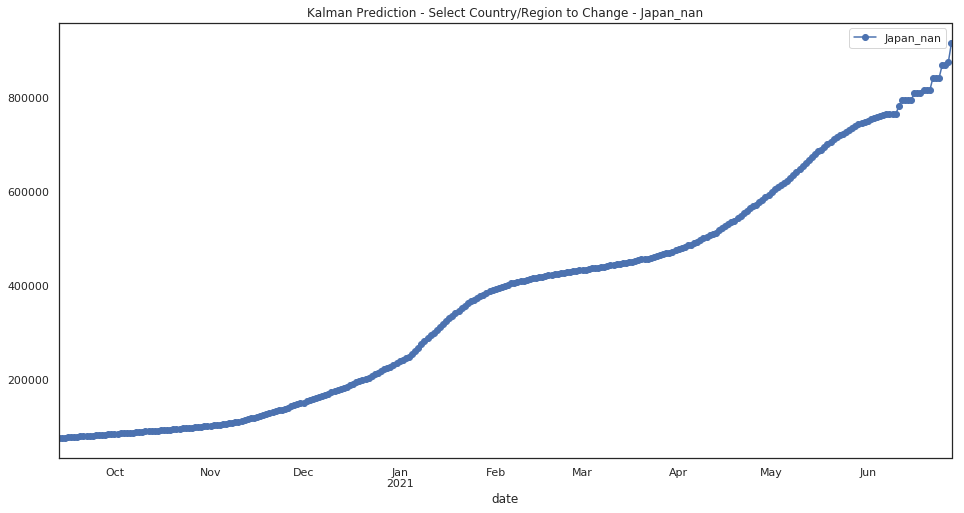

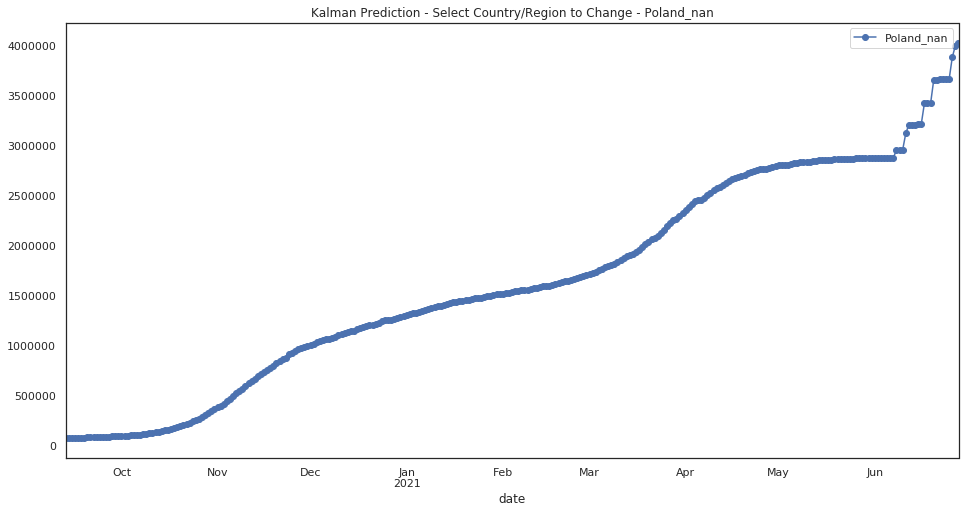

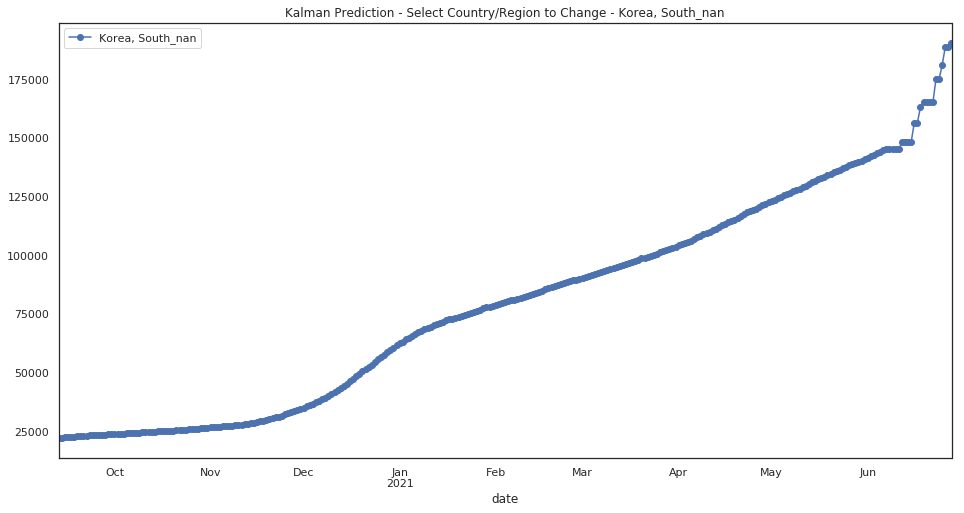

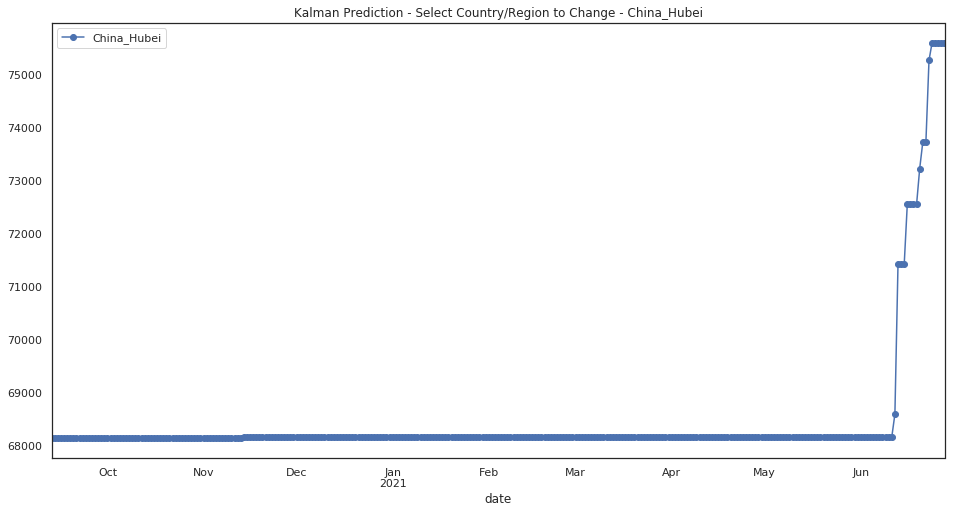

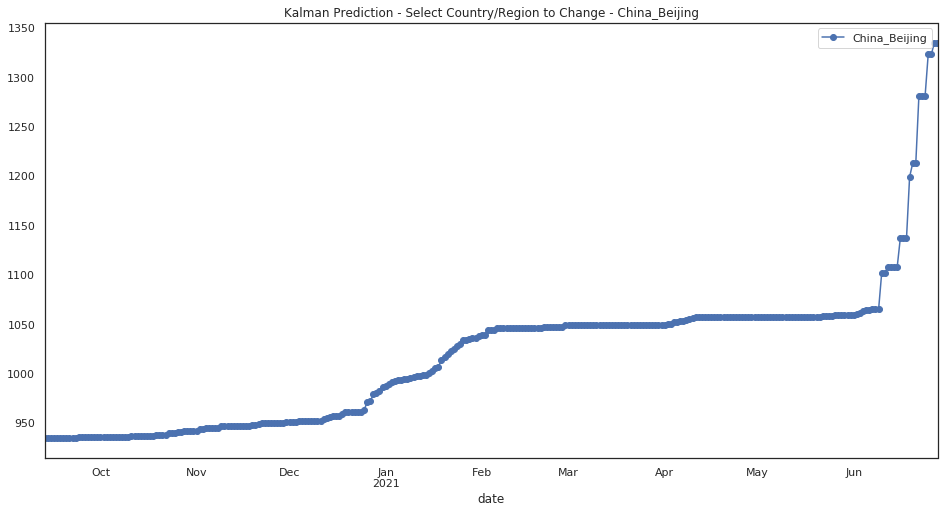

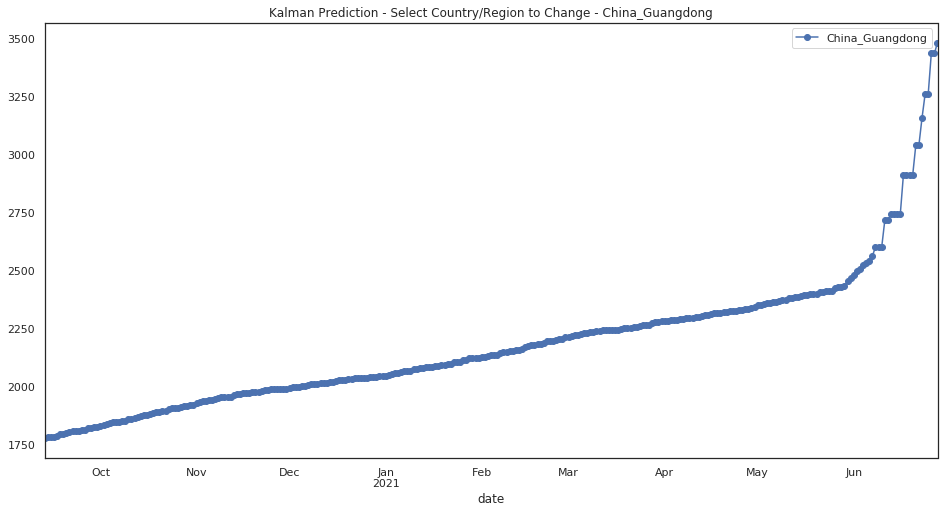

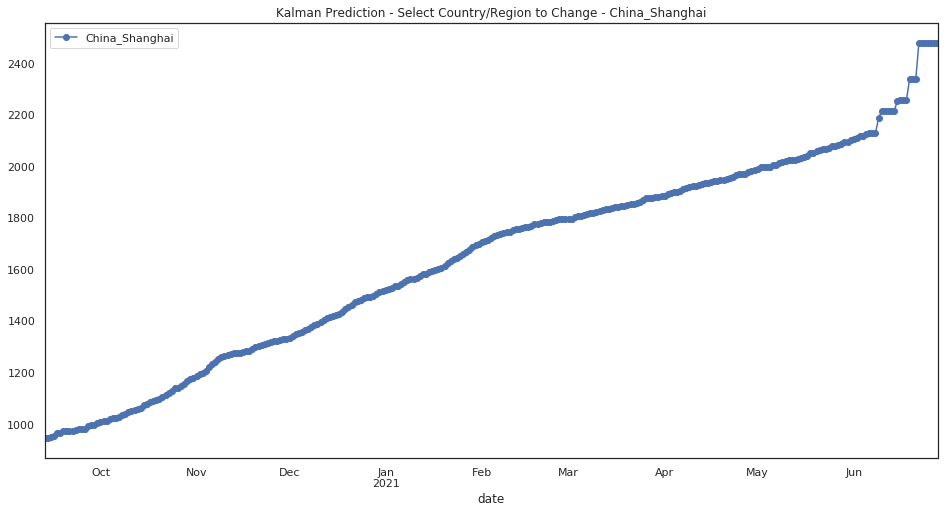

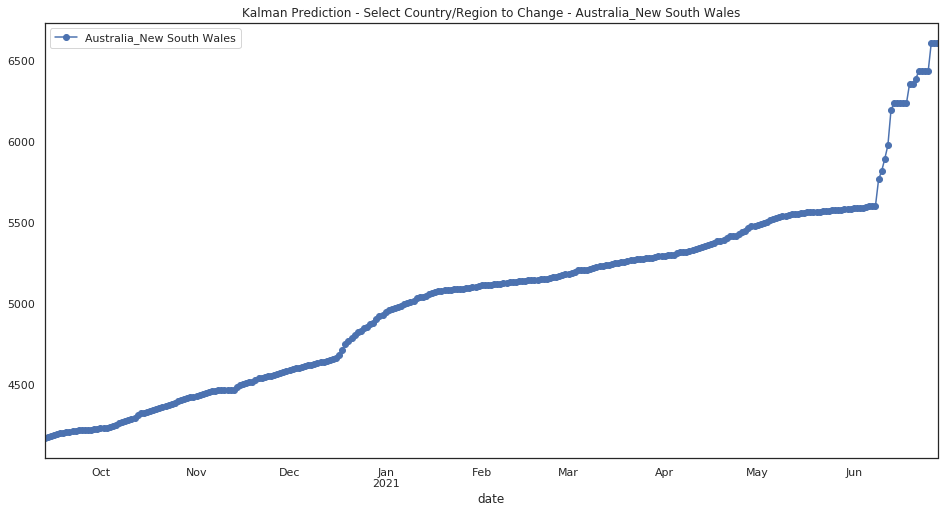

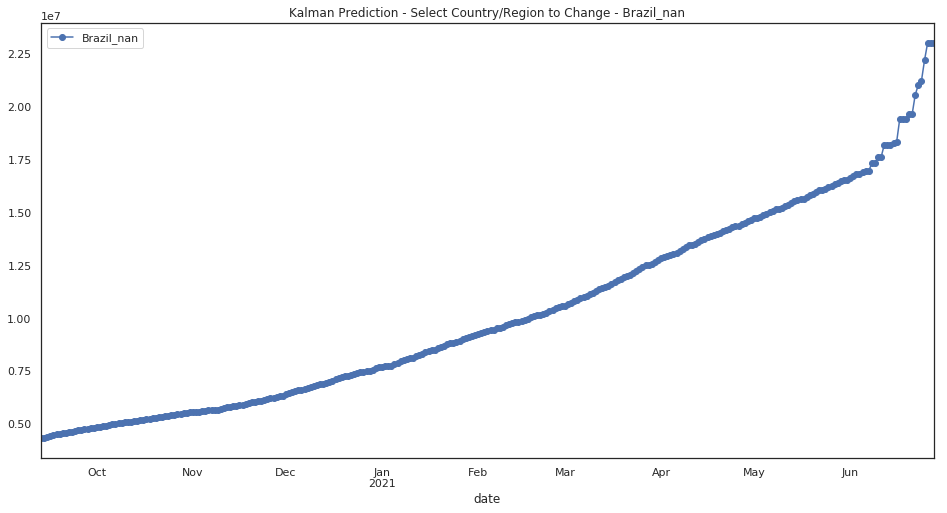

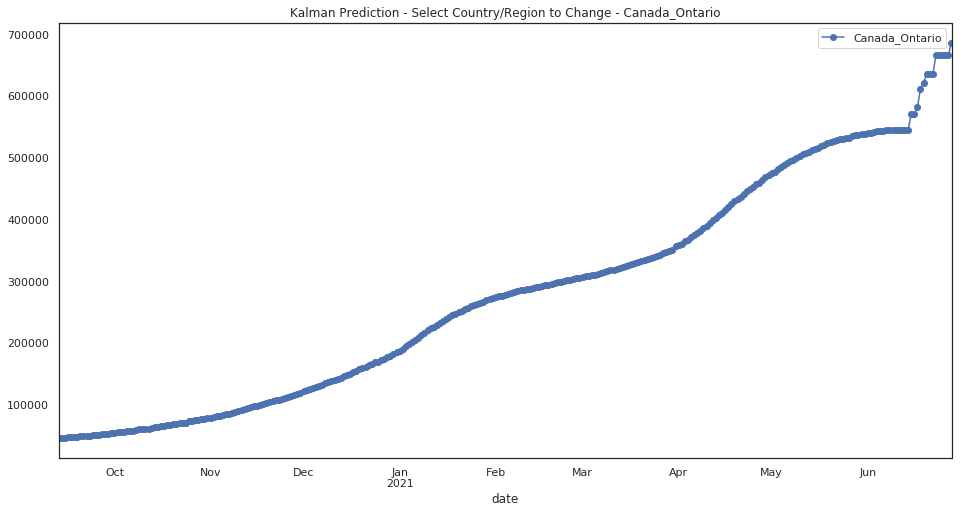

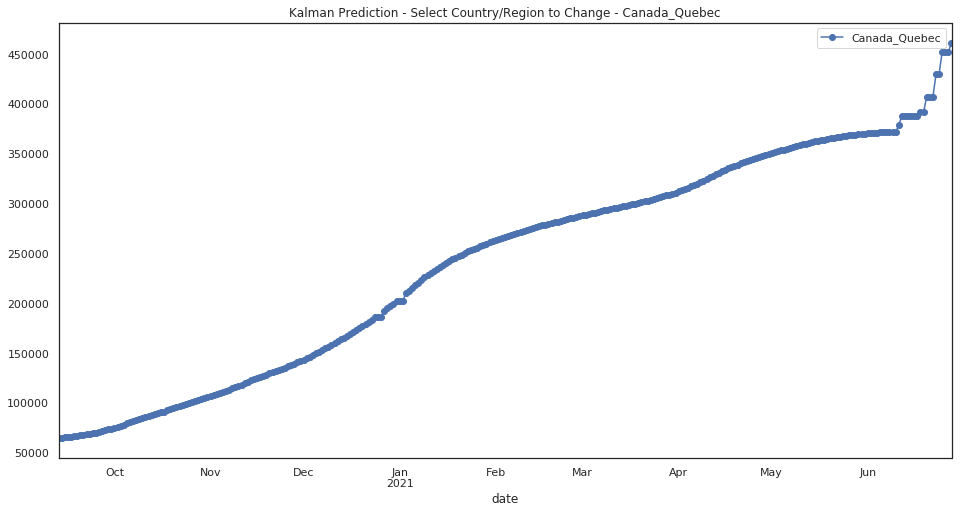

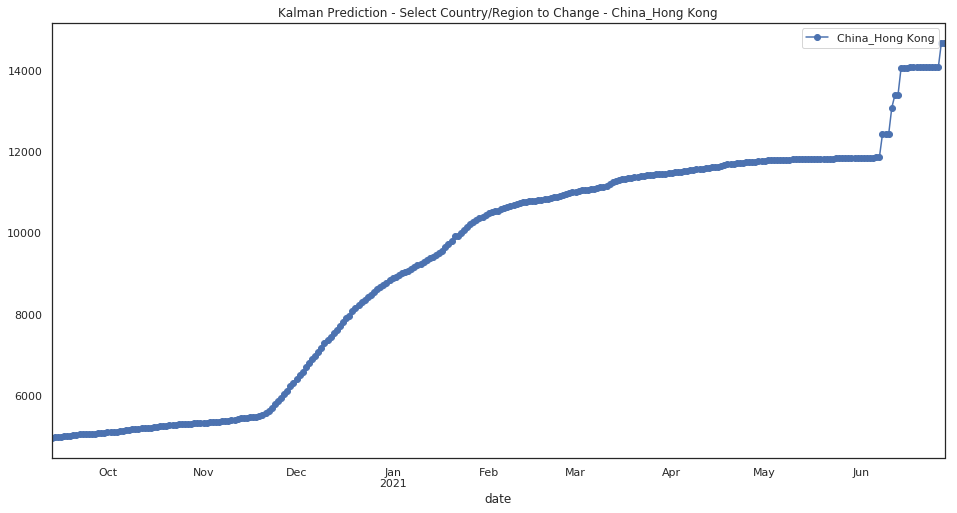

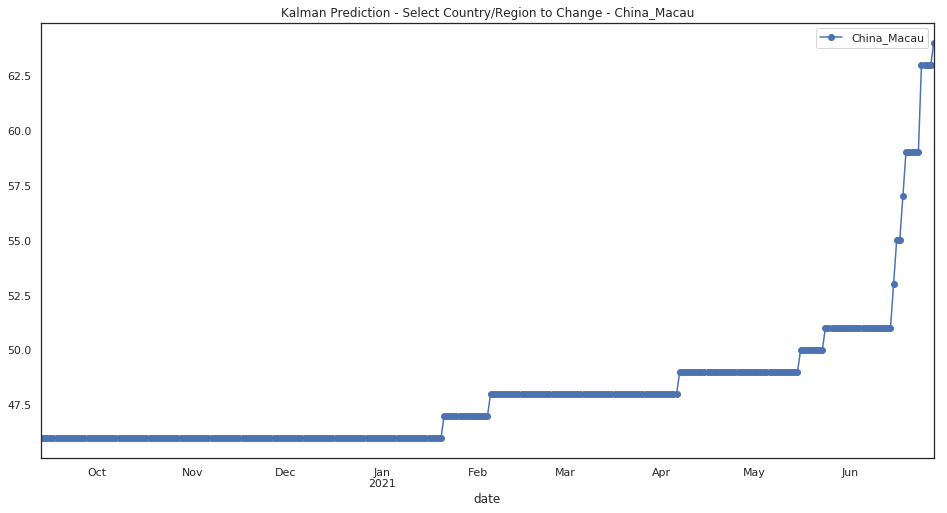

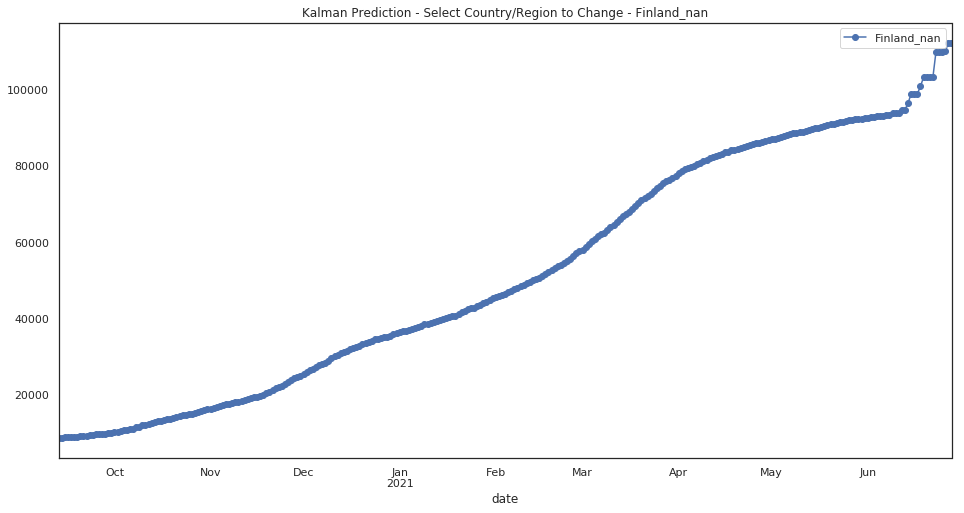

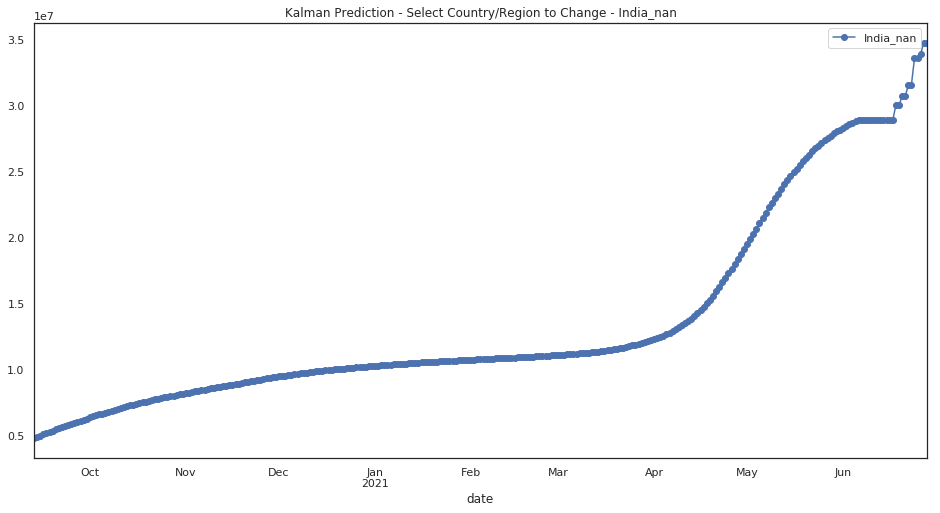

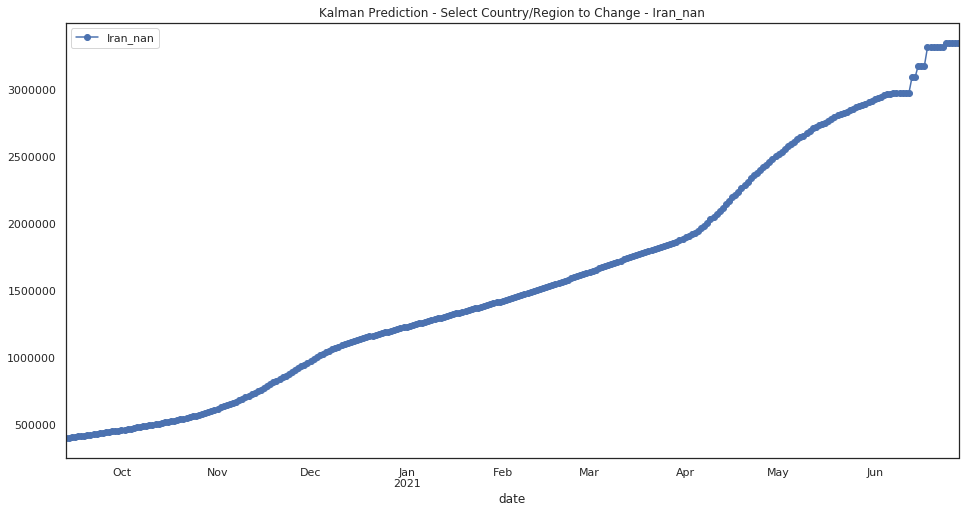

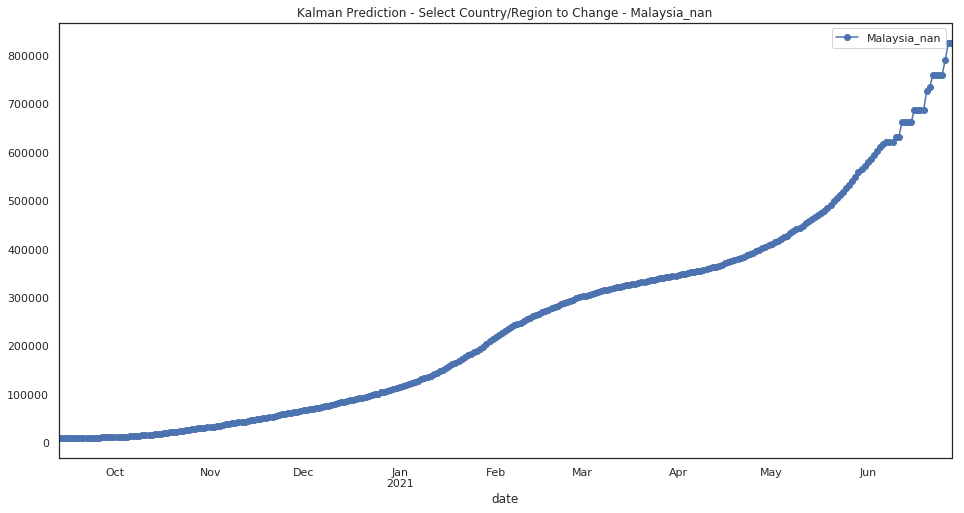

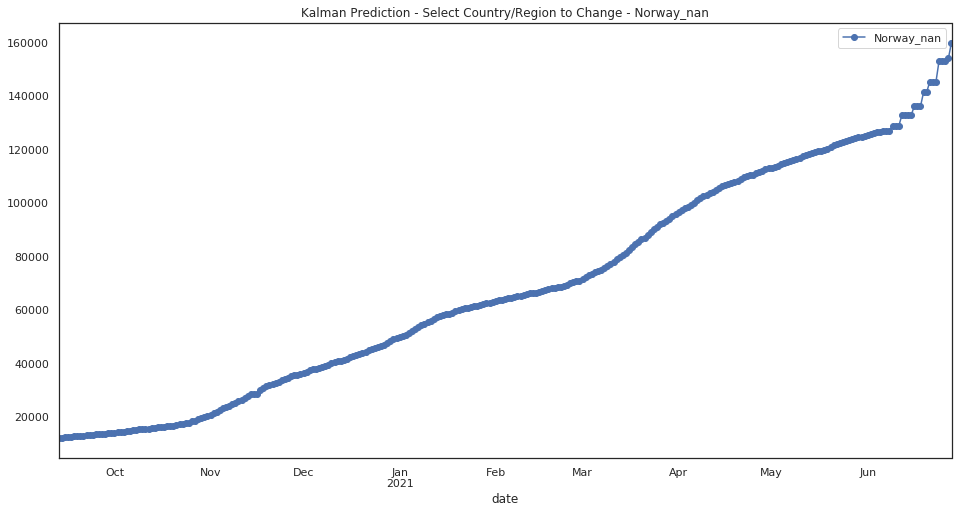

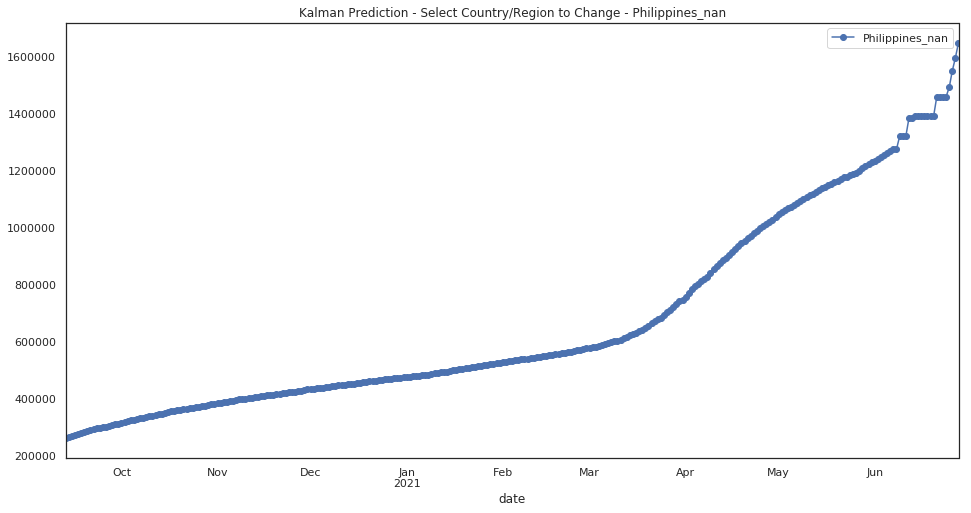

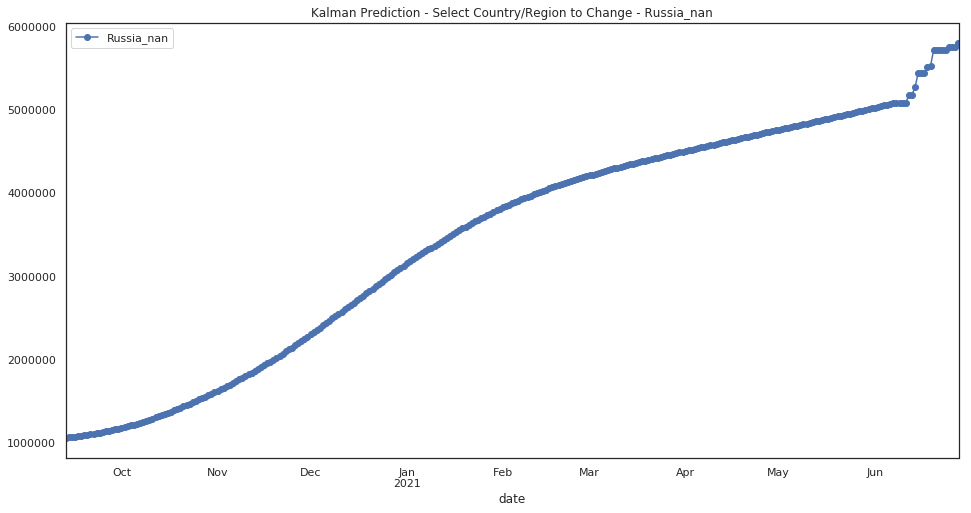

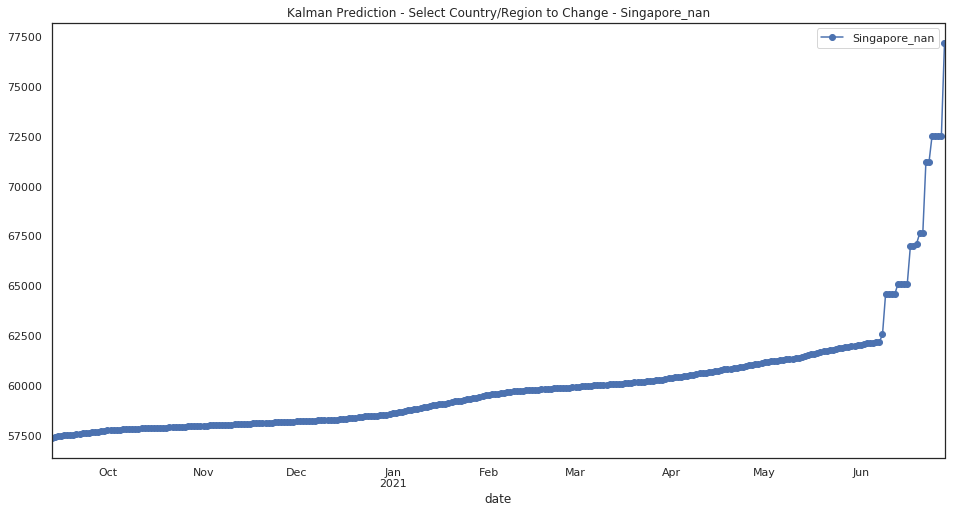

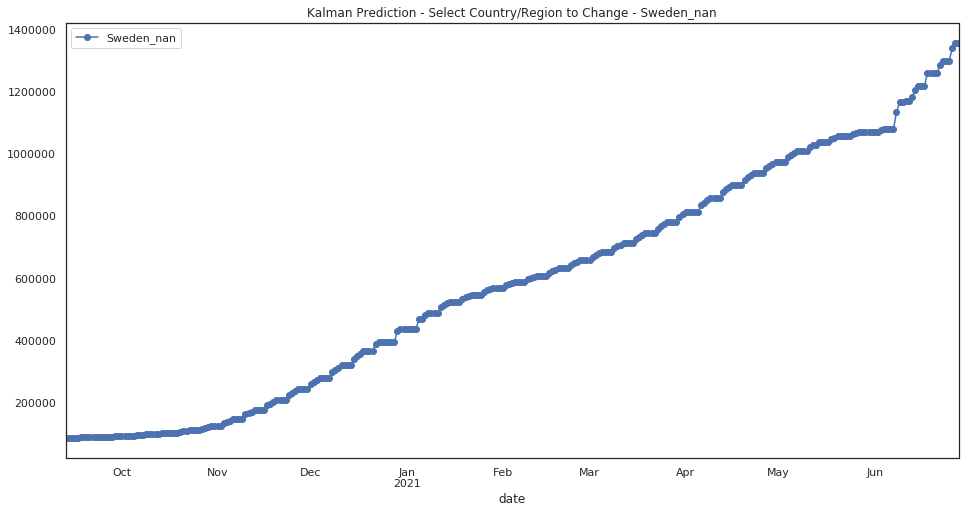

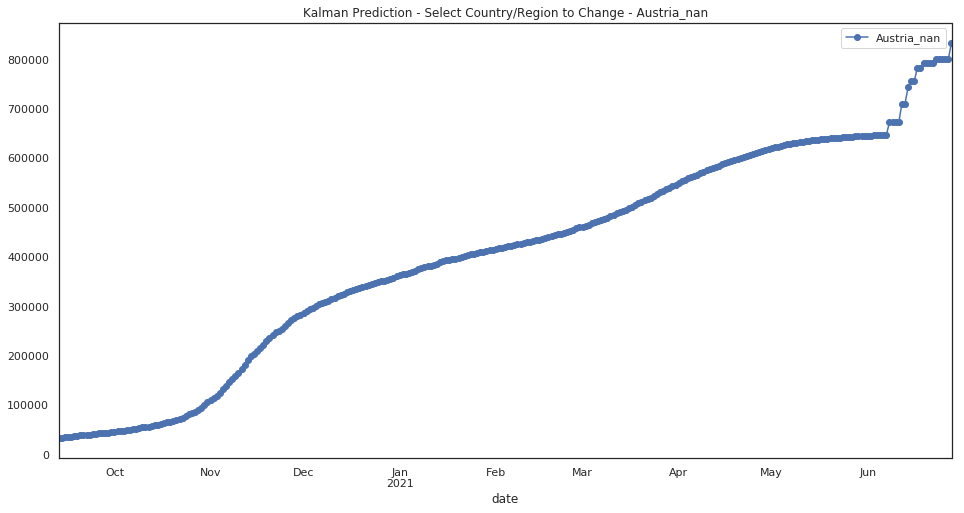

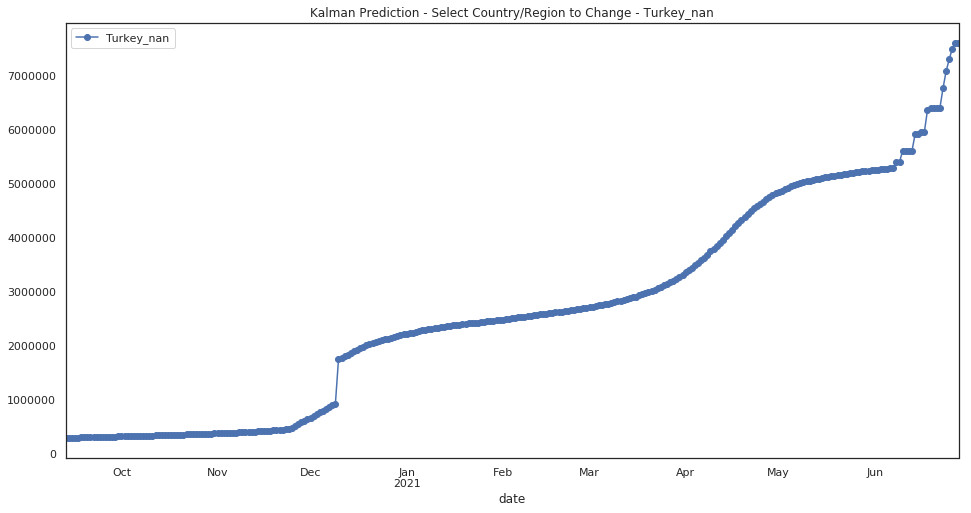

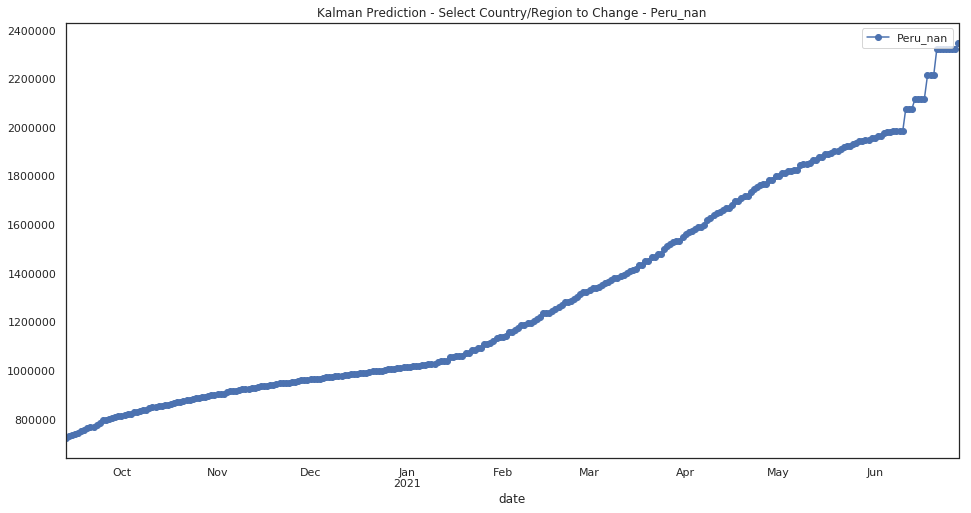

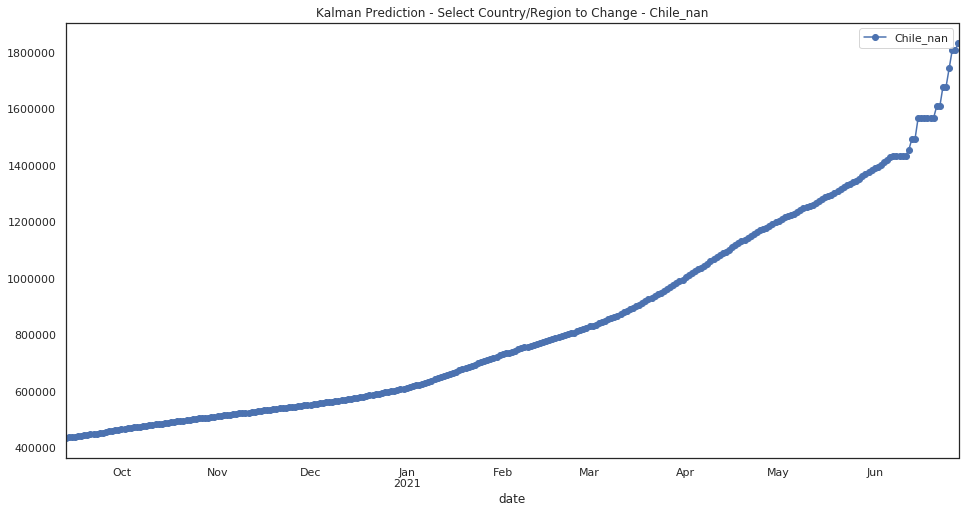

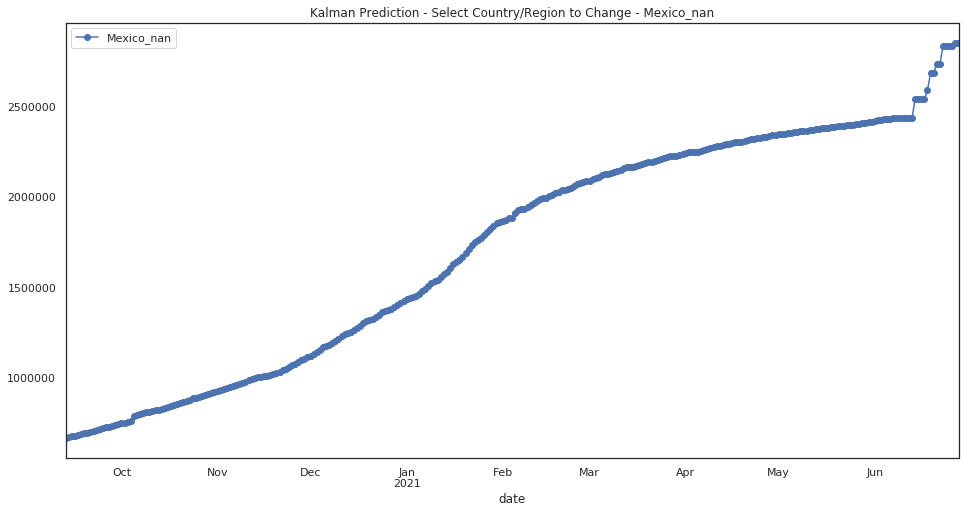

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-06-28 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      45052933.0
India_nan                                           NaN      34767721.0
Brazil_nan                                          NaN      23038569.0
Turkey_nan                                          NaN       7616676.0
France_nan                                          NaN       7032583.0
Italy_nan                                           NaN       6014674.0
Russia_nan                                          NaN       5804162.0
United Kingdom_nan                                  NaN       5284312.0
Argentina_nan                                       NaN       5242560.0
Colombia_nan                                        NaN       4807648.0
Germany_nan                                         NaN       4673838.0
Spain_nan                                           NaN       4067136.0
Poland_nan                                          NaN       4027181.0
Iran_nan                                            NaN       3347399.0
Ukraine_nan                                         NaN       2960082.0
Mexico_nan                                          NaN       2853752.0
South Africa_nan                                    NaN       2398564.0
Peru_nan                                            NaN       2348859.0
Indonesia_nan                                       NaN       2130490.0
Czechia_nan                                         NaN       2058886.0
Netherlands_nan                                     NaN       1872733.0
Chile_nan                                           NaN       1834919.0
Iraq_nan                                            NaN       1825234.0
Philippines_nan                                     NaN       1650561.0
Romania_nan                                         NaN       1632208.0
Pakistan_nan                                        NaN       1472946.0
Belgium_nan                                         NaN       1377588.0
Sweden_nan                                          NaN       1356914.0
Portugal_nan                                        NaN       1167485.0
Jordan_nan                                          NaN       1163033.0
...                                                 ...             ...
Canada_Prince Edward Island                         NaN           225.0
Australia_Northern Territory                        NaN           222.0
China_Guizhou                                       NaN           191.0
France_New Caledonia                                NaN           154.0
Australia_Australian Capital Territory              NaN           153.0
Canada_Northwest Territories                        NaN           147.0
United Kingdom_Anguilla                             NaN           118.0
Canada_Yukon                                        NaN           107.0
Saint Kitts and Nevis_nan                           NaN            99.0
China_Ningxia                                       NaN            93.0
United Kingdom_Falkland Islands (Malvinas)          NaN            73.0
Denmark_Greenland                                   NaN            69.0
China_Macau                                         NaN            64.0
France_Saint Pierre and Miquelon                    NaN            29.0
Holy See_nan                                        NaN            29.0
Solomon Islands_nan                                 NaN            25.0
United Kingdom_Montserrat                           NaN            25.0
China_Qinghai                                       NaN            20.0
Canada_Repatriated Travellers                       NaN            14.0
Canada_Grand Princess                               NaN            14.0
MS Zaandam_nan                                      NaN             9.0
Vanuatu_nan                                         NaN             4.0
Marshall Islands_nan                                NaN             4.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Samoa_nan             

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          47998.0      24379.0      56231.0      15740.0   
2020-09-14          48046.0      24523.0      56440.0      15821.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48995.0       1483.0   
2020-09-18          38872.0      11948.0      49213.0       1483.0   
2020-09-19          38897.0      12073.0      49421.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39192.0      12537.0      50090.0       1909.0   
2020-09-22          39209.0      12685.0      50282.0       1681.0   
2020-09-23          39255.0      12820.0      50470.0       2017.0   
2020-09-24          39276.0      12955.0      50650.0       1753.0   
2020-09-25          39289.0      13067.0      50827.0       2052.0   
2020-09-26          39296.0      13185.0      50990.0       1836.0   
2020-09-27          39322.0      13303.0      51142.0       2067.0   
2020-09-28          39348.0      13431.0      51289.0       2179.0   
2020-09-29          39362.0      13543.0      51442.0       1966.0   
2020-09-30          39378.0      13682.0      51607.0       2303.0   
2020-10-01          39394.0      13838.0      51772.0       2050.0   
2020-10-02          39403.0      13983.0      51932.0       2321.0   
2020-10-03          39408.0      14140.0      52083.0       2110.0   
2020-10-04          39446.0      14297.0      52222.0       2302.0   
2020-10-05          39528.0      14440.0      52355.0       2526.0   
2020-10-06          39602.0      14597.0      52481.0       2370.0   
2020-10-07          39666.0      14750.0      52602.0       2891.0   
2020-10-08          39731.0      14917.0      52738.0       2568.0   
2020-10-09          39802.0      15085.0      52888.0       2975.0   
2020-10-10          39818.0      15254.0      53030.0       2696.0   
2020-10-11          39888.0      15423.0      53163.0       2942.0   
2020-10-12          39971.0      15592.0      53399.0       3200.0   
...                     ...          ...          ...          ...   
2021-05-31          71814.0     132385.0     129001.0      13744.0   
2021-06-01          73055.0     132401.0     129255.0      13730.0   
2021-06-02          74111.0     132422.0     129707.0      13770.0   
2021-06-03          75199.0     132429.0     130103.0      13773.0   
2021-06-04          76628.0     132440.0     130457.0      13779.0   
2021-06-05          78088.0     132444.0     130803.0      13782.0   
2021-06-06          79312.0     132445.0     131045.0      13783.0   
2021-06-07          80826.0     132451.0     131340.0      13798.0   
2021-06-08          84126.0     138066.0     131386.0      13791.0   
2021-06-09          85215.0     141571.0     131283.0      13804.0   
2021-06-10          84318.0     139022.0     131283.0      13805.0   
2021-06-11          89563.0     140738.0     136761.0      13802.0   
2021-06-12          92402.0     144553.0     142344.0      13802.0   
2021-06-13          92816.0     145895.0     145944.0      14041.0   
2021-06-14          94276.0     144784.0     150205.0      14053.0   
2021-06-15          93517.0     145662.0     148832.0      14387.0   
2021-06-16          97061.0     148318.0     148161.0      14370.0   
2021-06-17         100822.0     153874.0     154976.0      14415.0   
2021-06-18         100299.0     156481.0     160743.0      14686.0   
2021-06-19         103545.0     154396.0     158468.0      14684.0   
2021-06-20         105168.0     154396.0     159450.0      14707.0   
2021-06-21         104232.0     154396.0     164397.0      14723.0   
2021-06-22         104633.0     157105.0     166633.0      14684.0   
2021-06-23         106851.0     159497.0     165301.0      14684.0   
2021-06-24

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Turkey_nan',
 'France_nan',
 'Italy_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Argentina_nan',
 'Colombia_nan',
 'Germany_nan',
 'Spain_nan',
 'Poland_nan',
 'Iran_nan',
 'Ukraine_nan',
 'Mexico_nan',
 'South Africa_nan',
 'Peru_nan',
 'Indonesia_nan',
 'Czechia_nan',
 'Netherlands_nan',
 'Chile_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Romania_nan',
 'Pakistan_nan',
 'Belgium_nan',
 'Sweden_nan',
 'Portugal_nan',
 'Jordan_nan',
 'Serbia_nan',
 'Hungary_nan',
 'Israel_nan',
 'Bangladesh_nan',
 'Japan_nan',
 'Switzerland_nan',
 'Austria_nan',
 'Malaysia_nan',
 'Nepal_nan',
 'Canada_Ontario',
 'Lebanon_nan',
 'United Arab Emirates_nan',
 'Morocco_nan',
 'Ecuador_nan',
 'Kazakhstan_nan',
 'Saudi Arabia_nan',
 'Slovakia_nan',
 'Belarus_nan',
 'Bulgaria_nan',
 'Greece_nan',
 'Paraguay_nan',
 'Georgia_nan',
 'Canada_Quebec',
 'Tunisia_nan',
 'Panama_nan',
 'Croatia_nan',
 'Bolivia_nan',
 'Azerbaijan_nan',
 'Egypt_nan',
 'Costa Rica_nan',

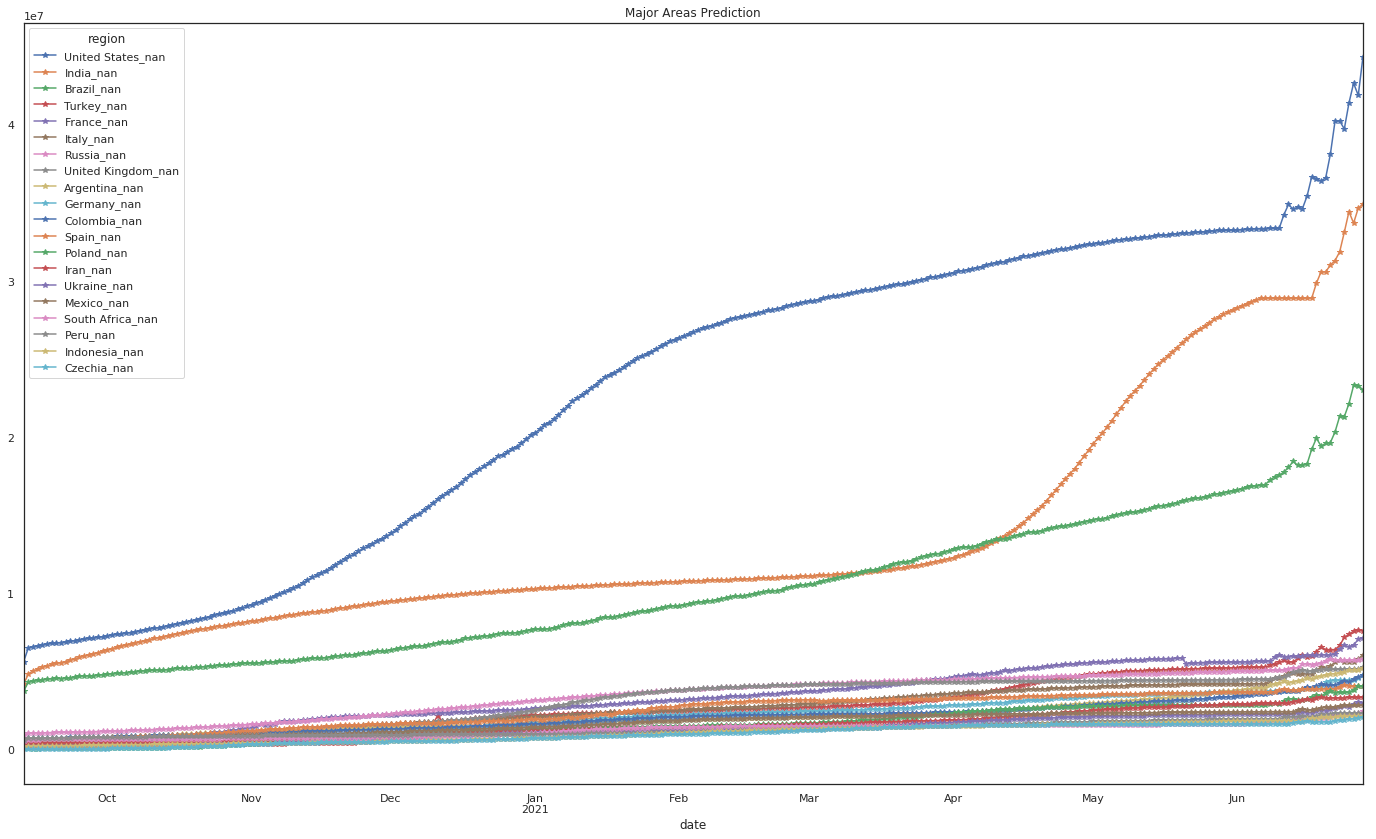

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

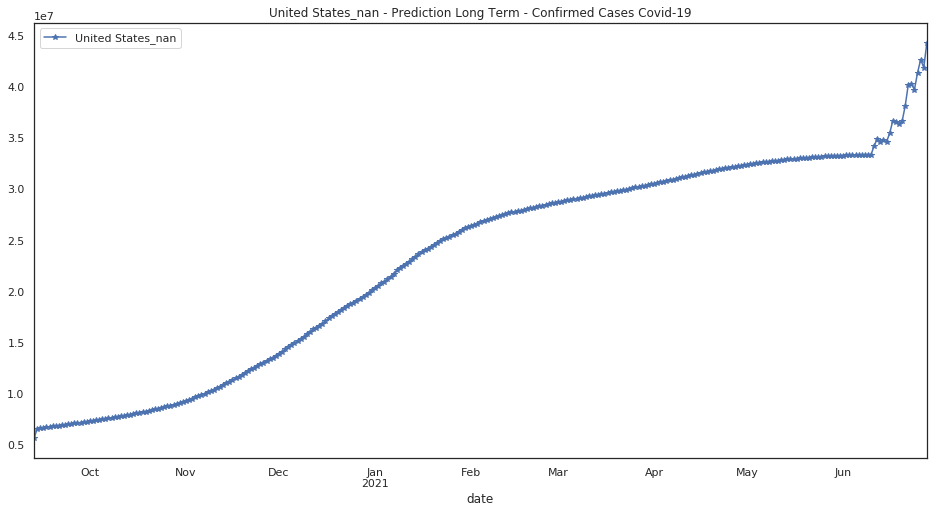

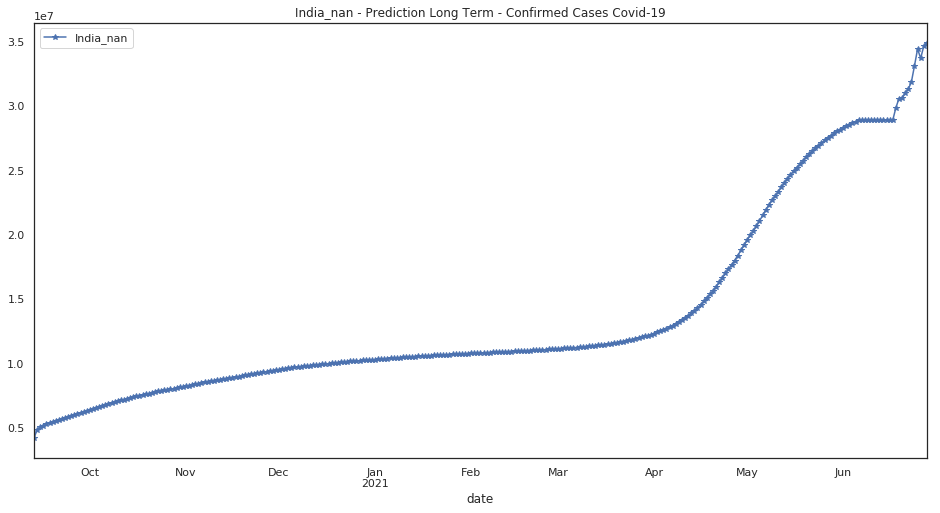

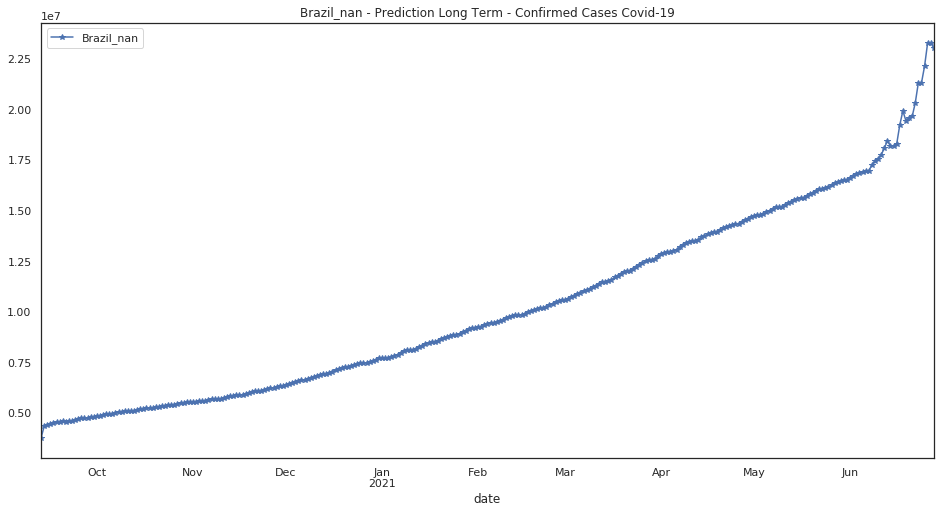

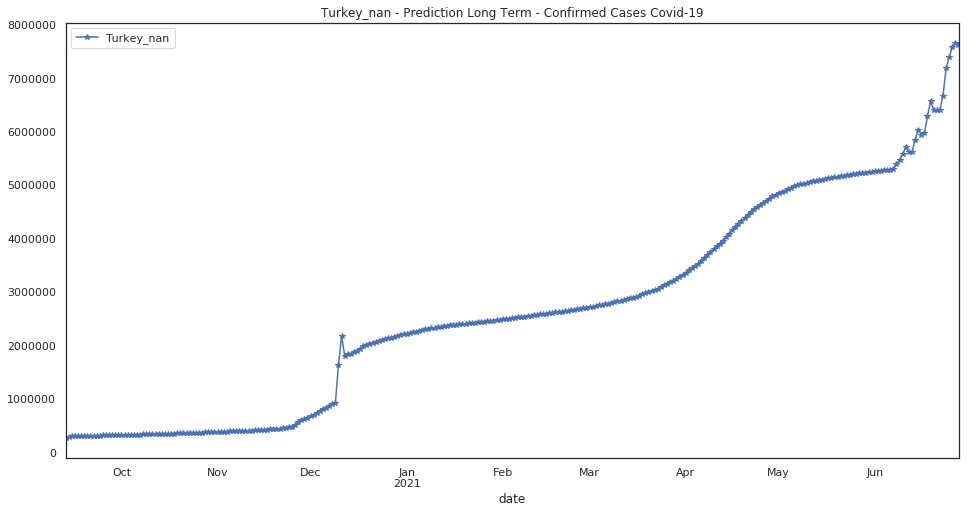

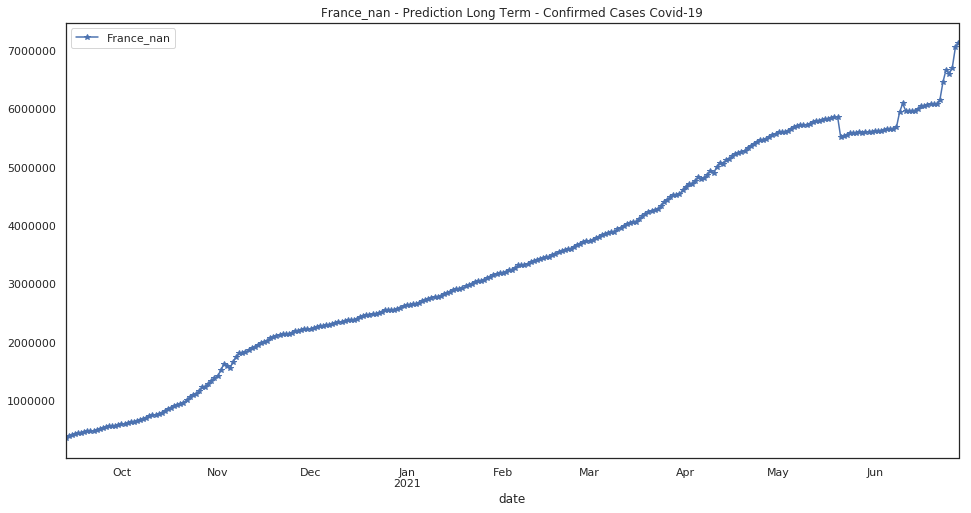

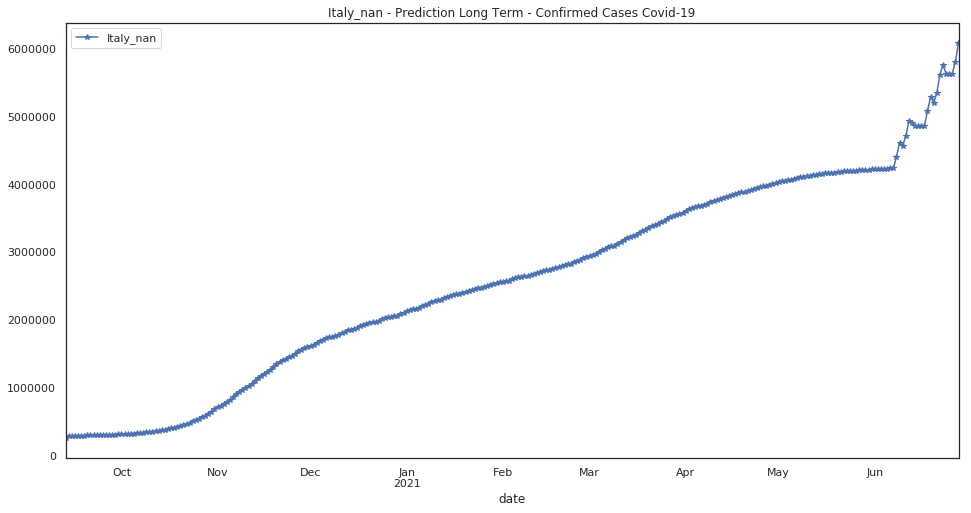

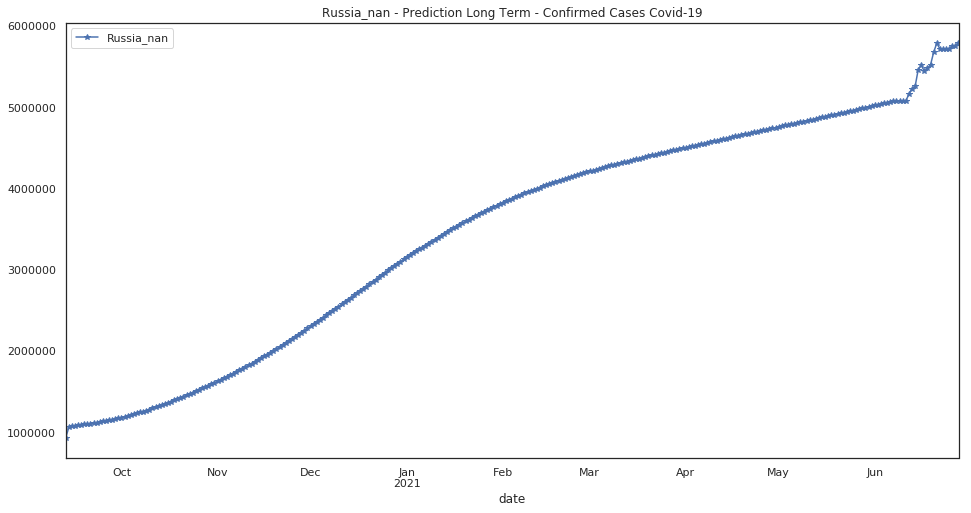

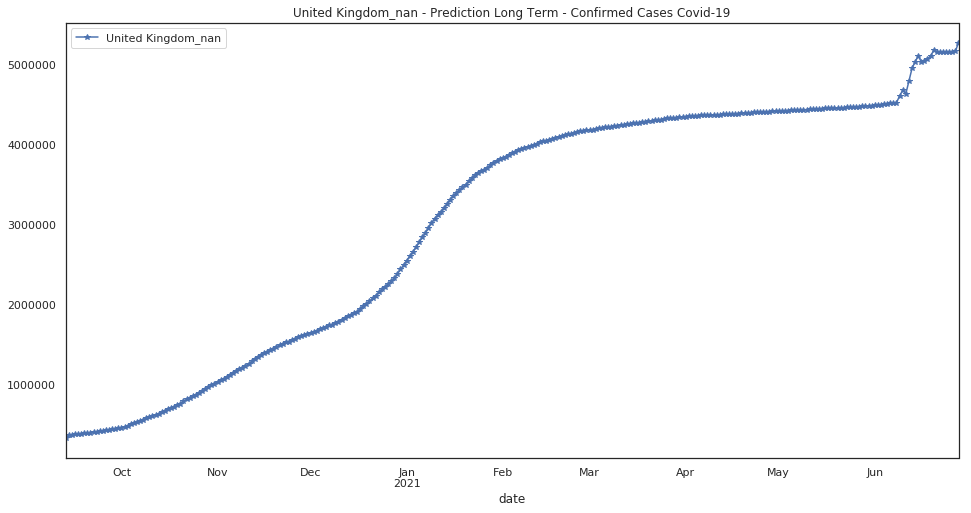

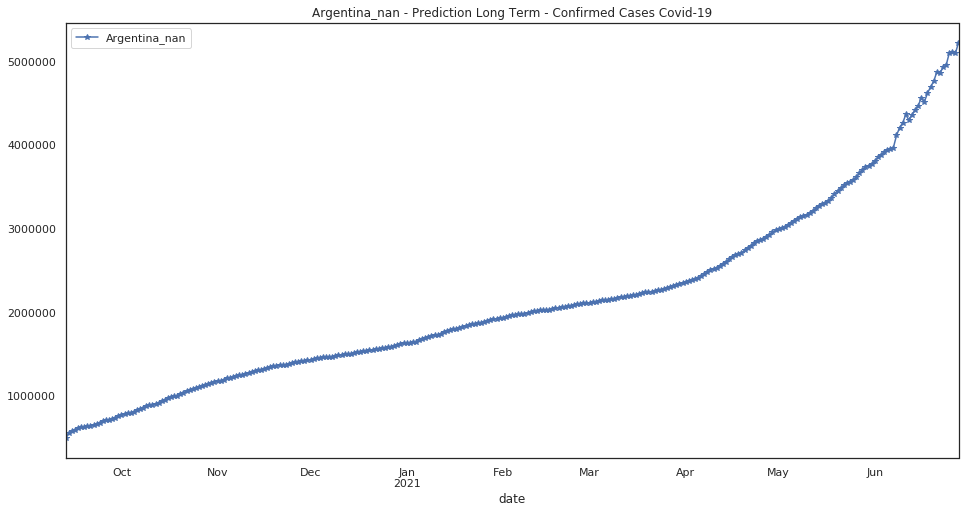

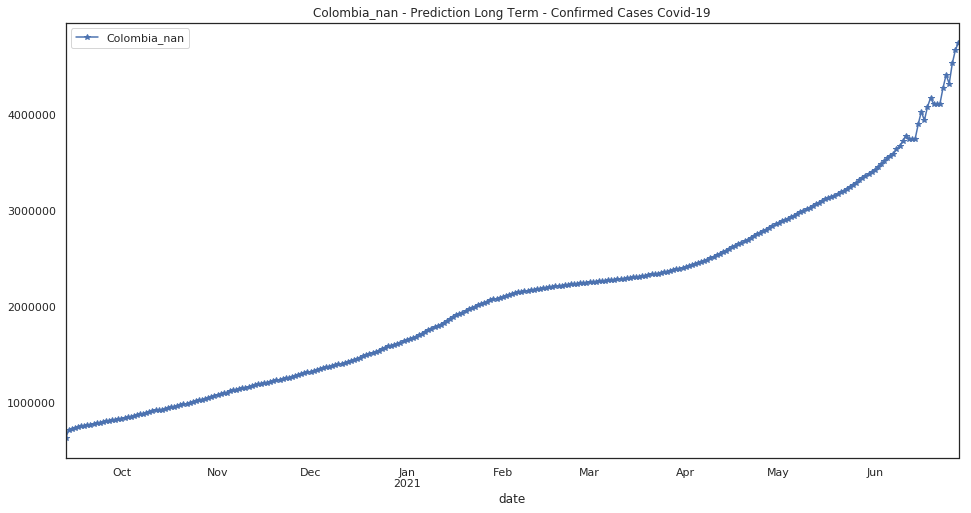

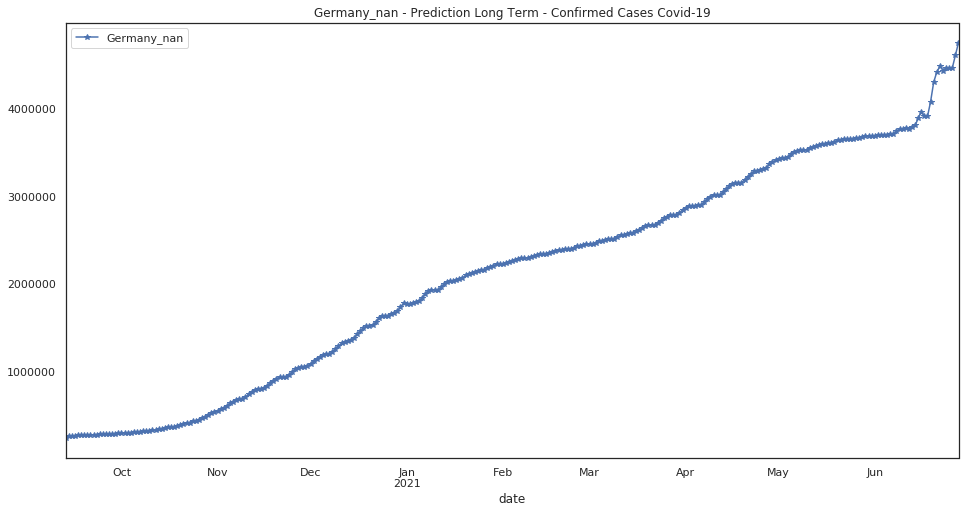

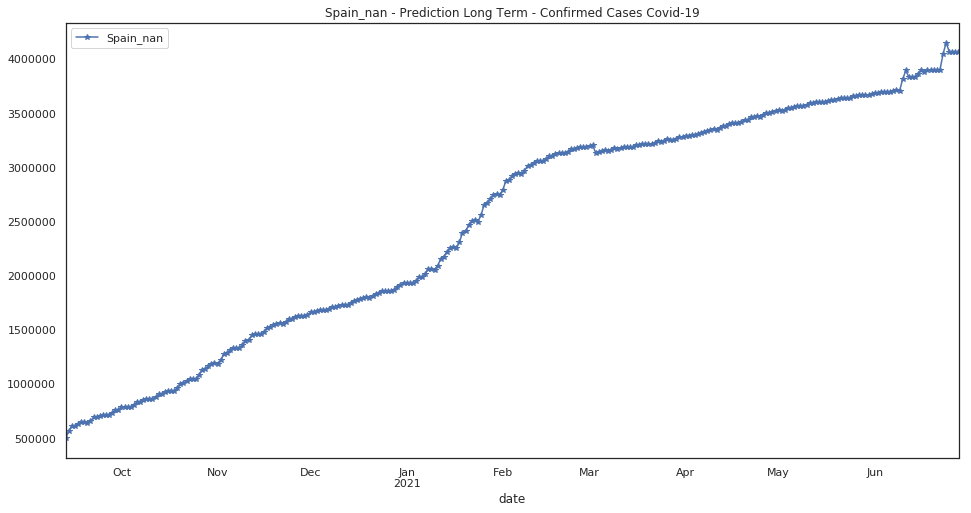

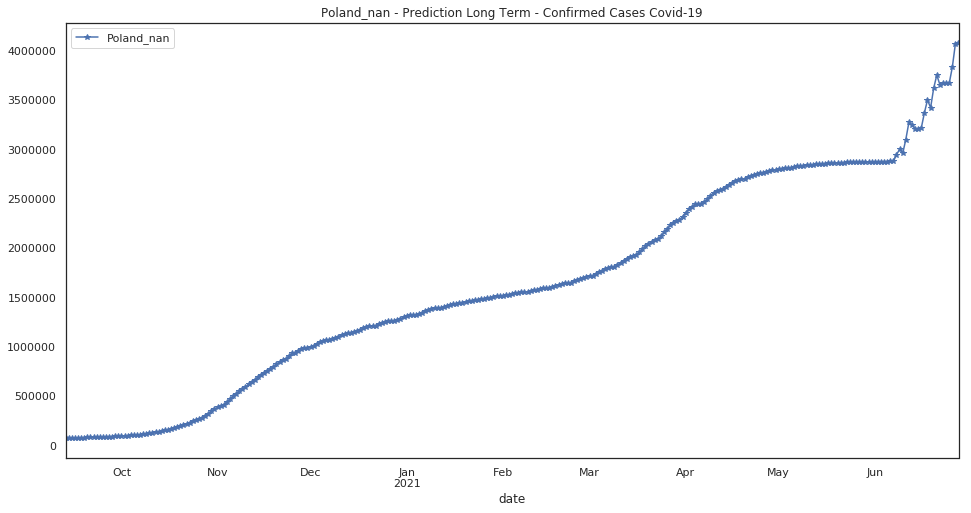

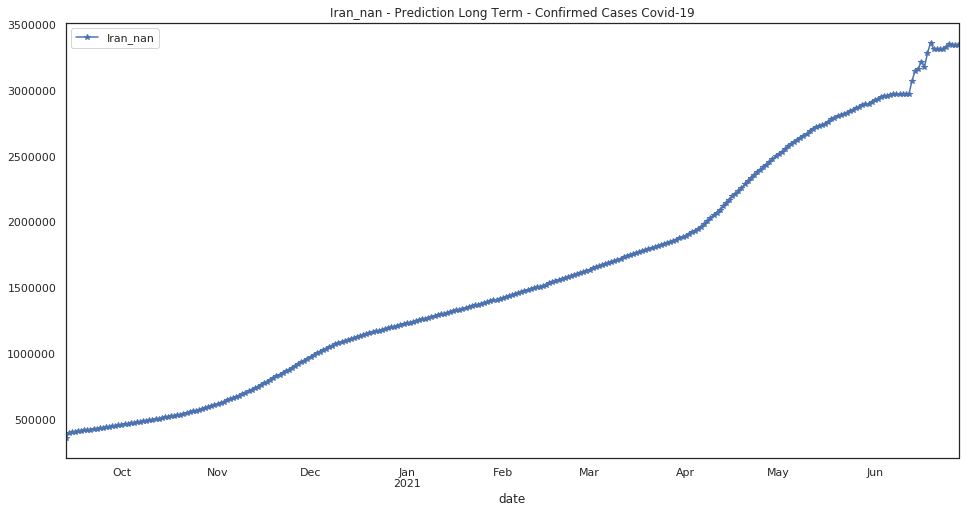

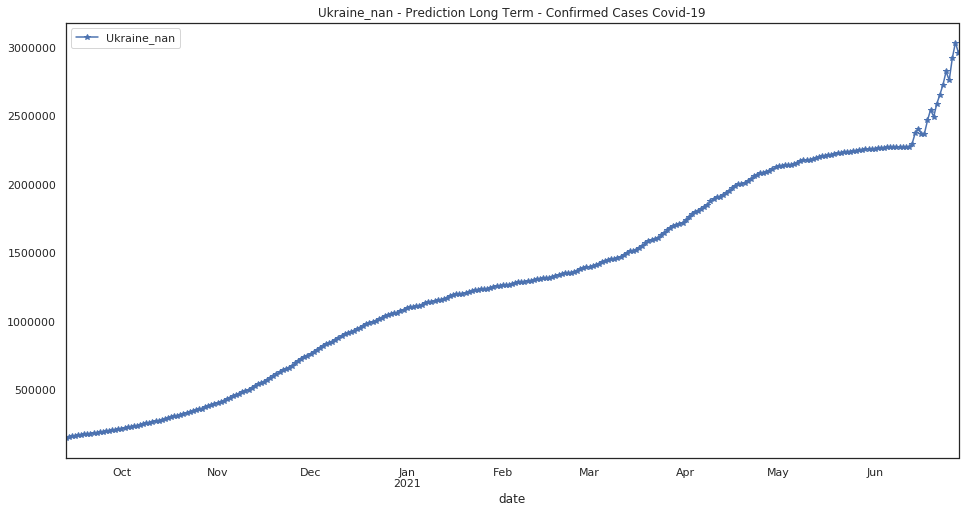

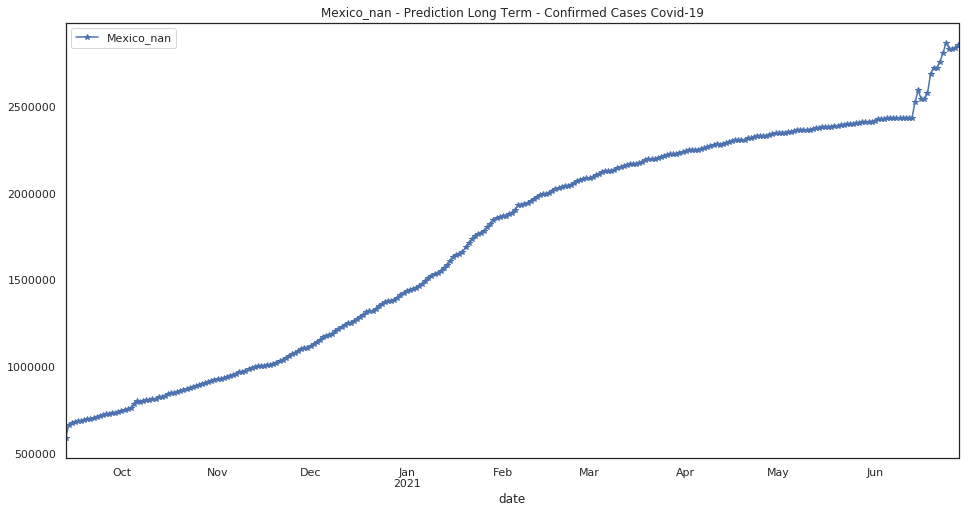

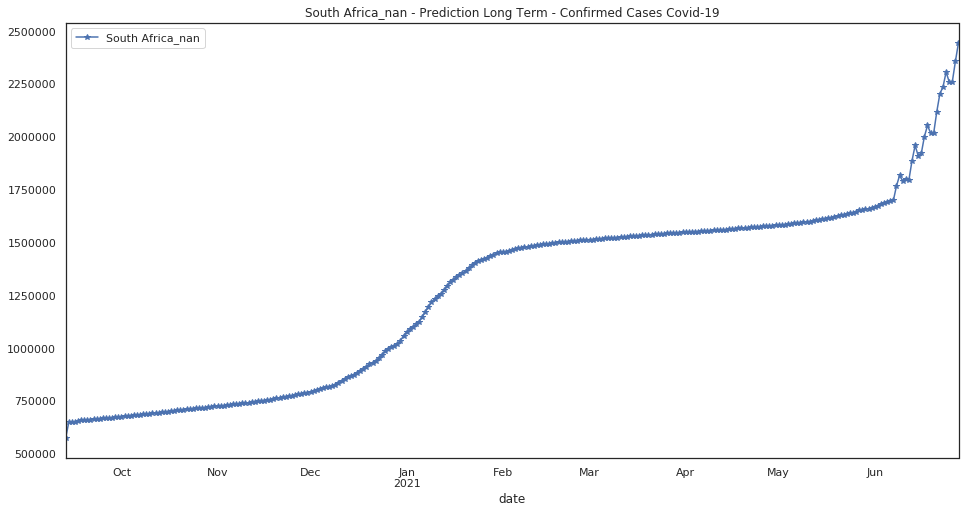

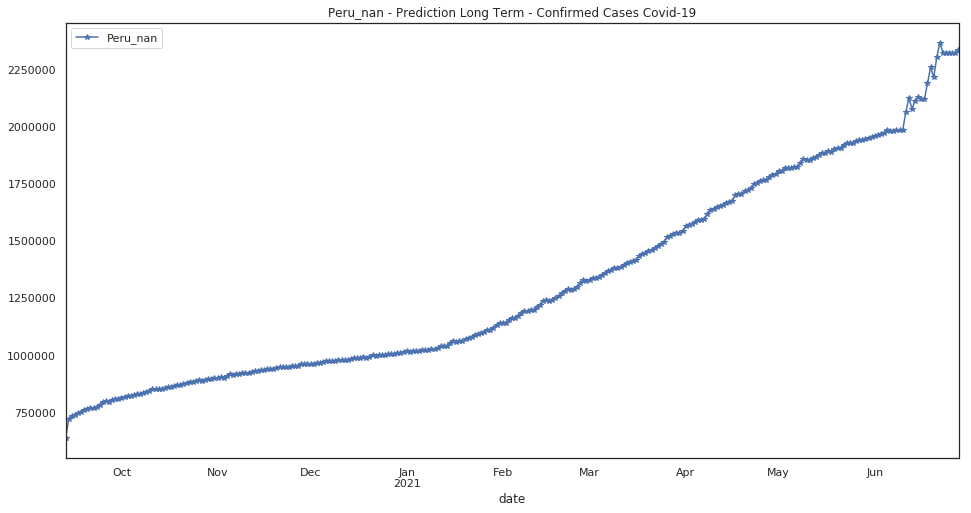

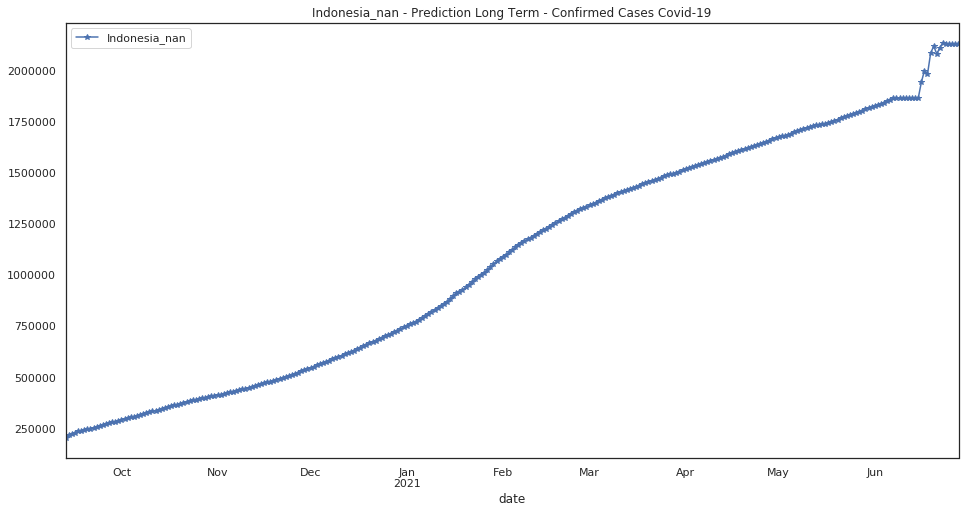

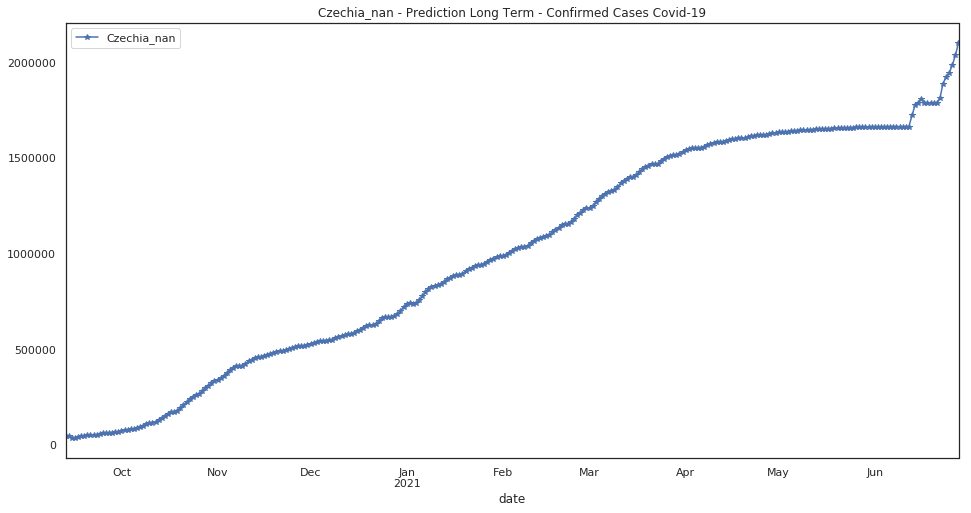

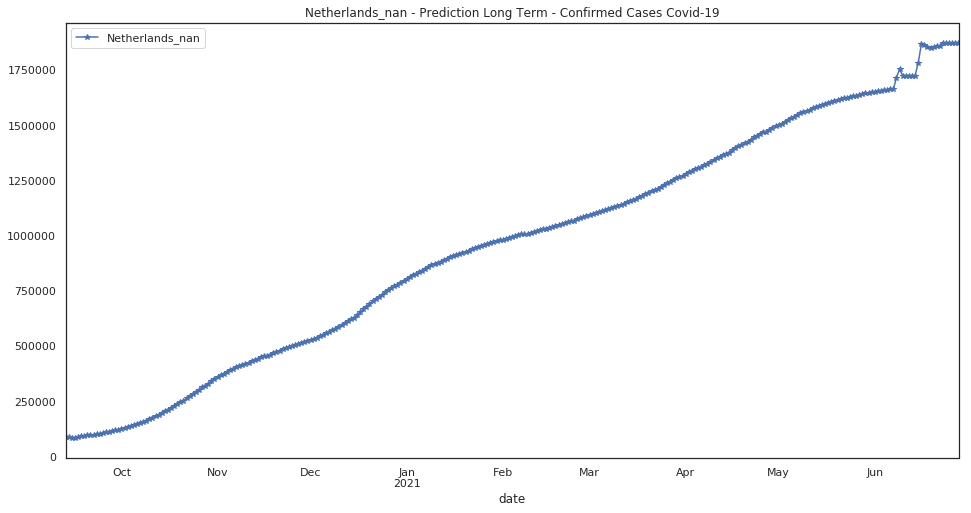

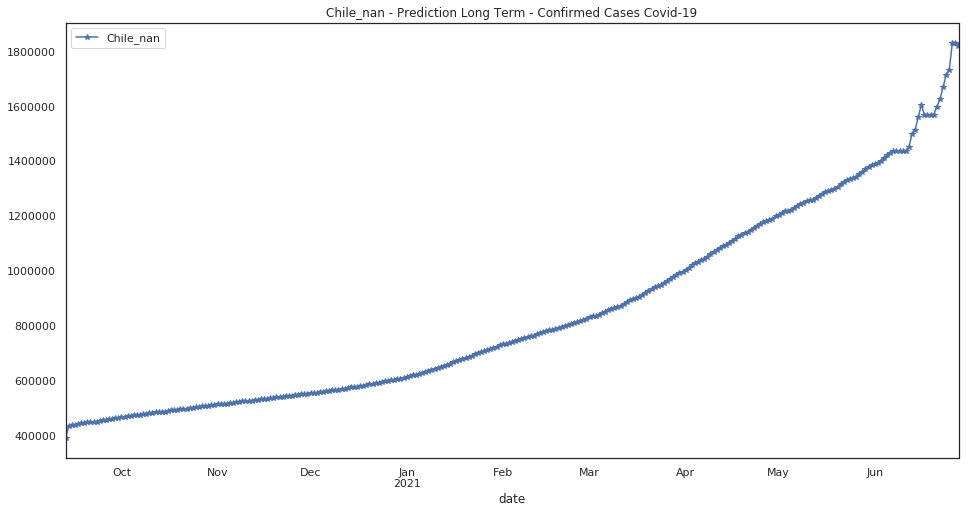

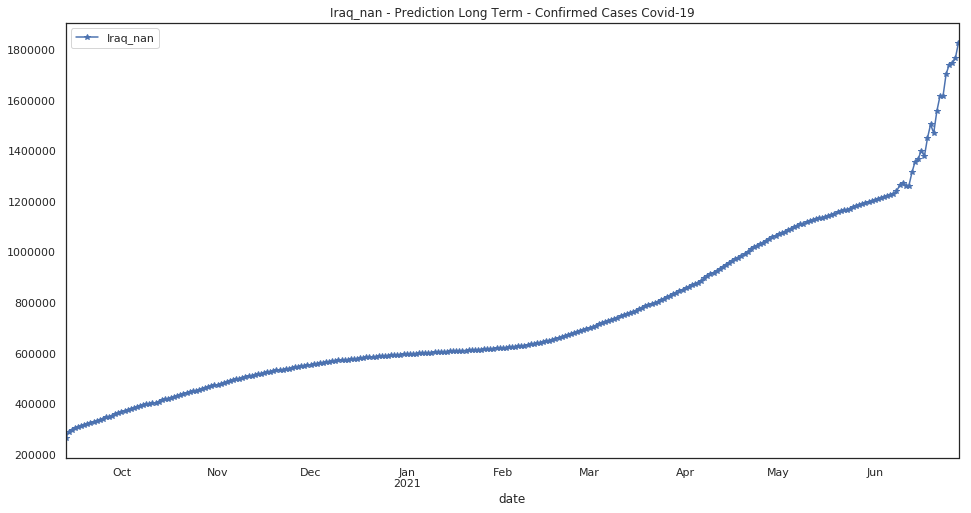

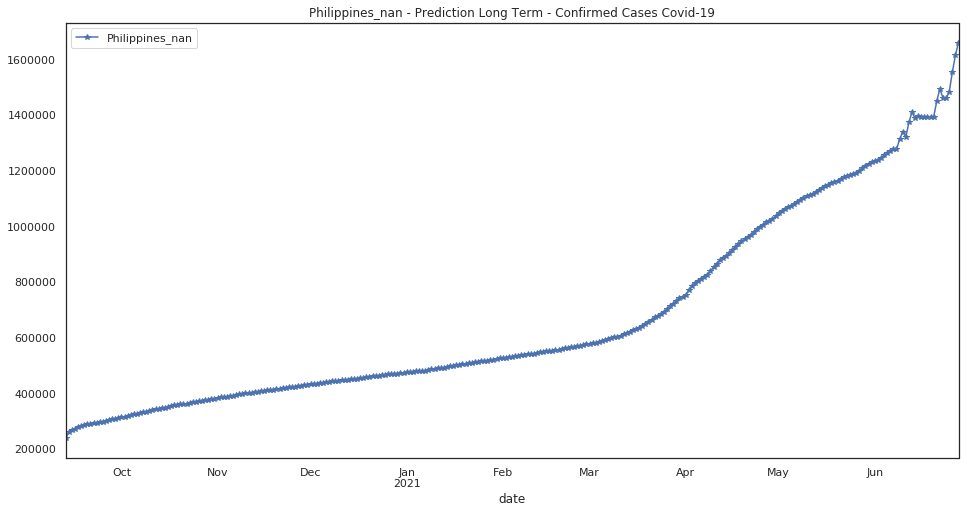

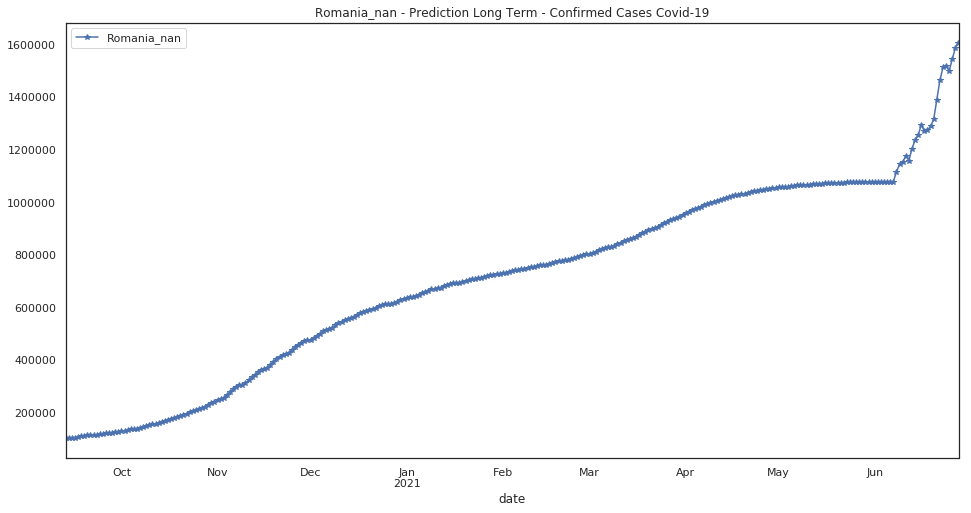

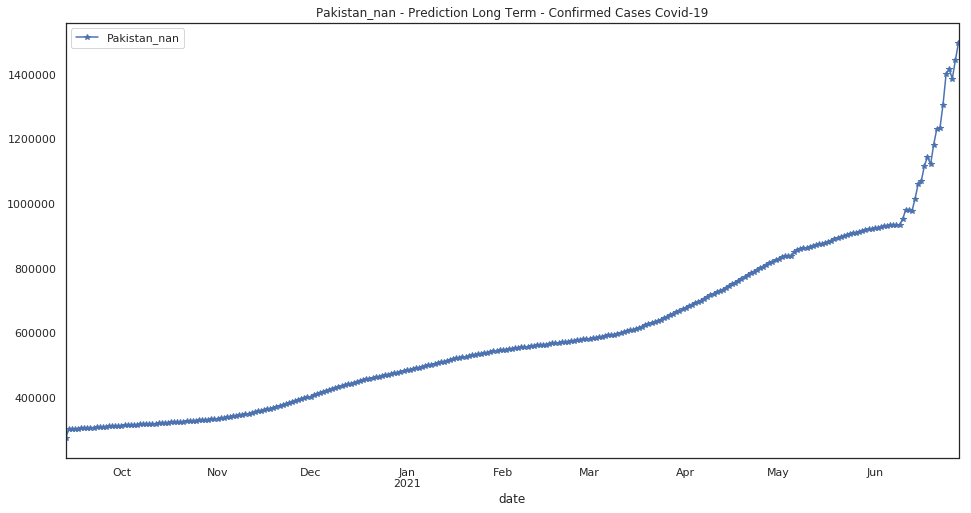

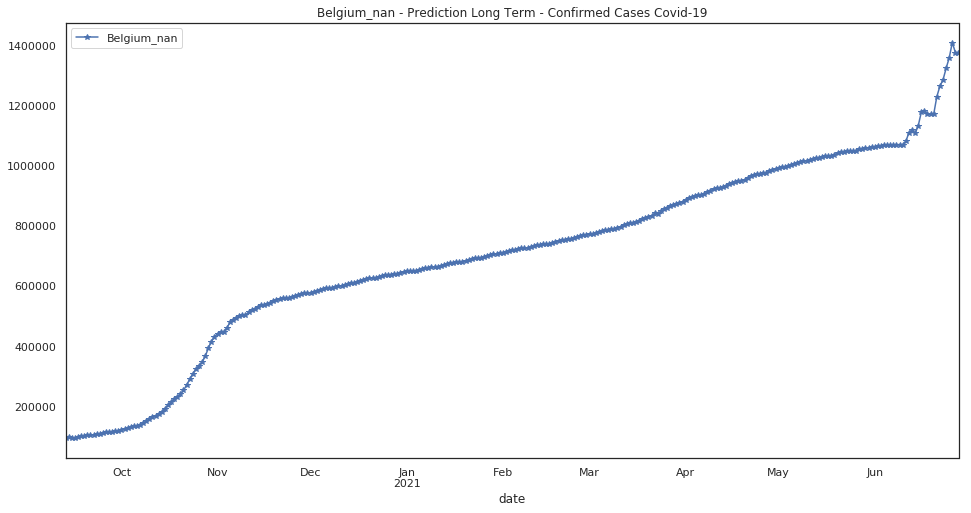

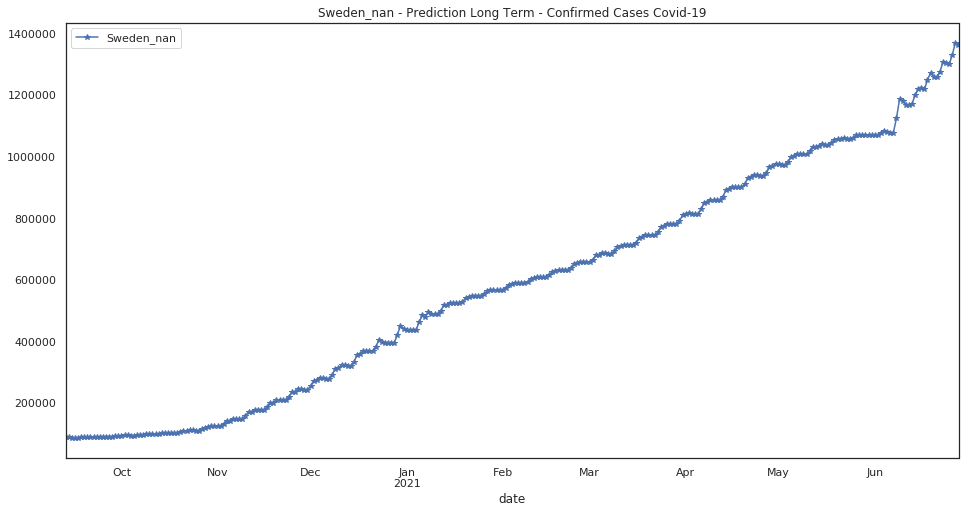

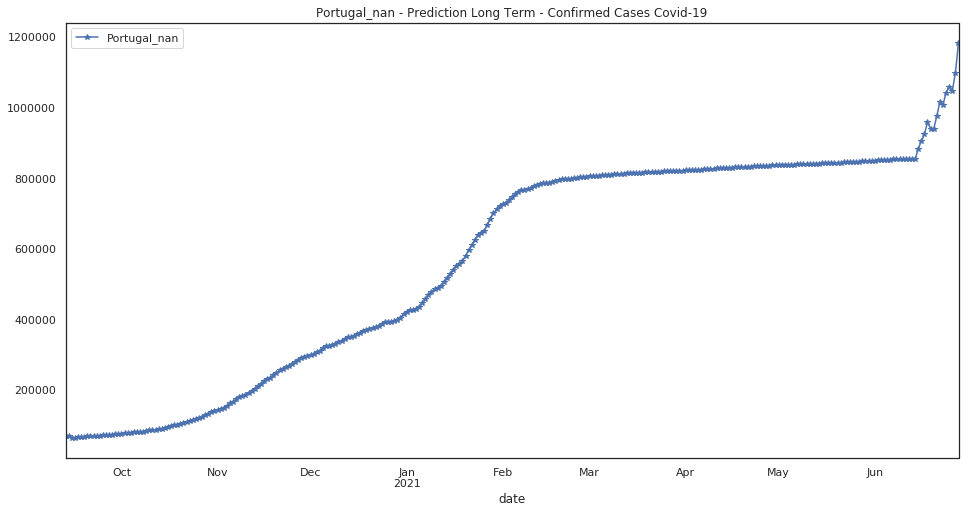

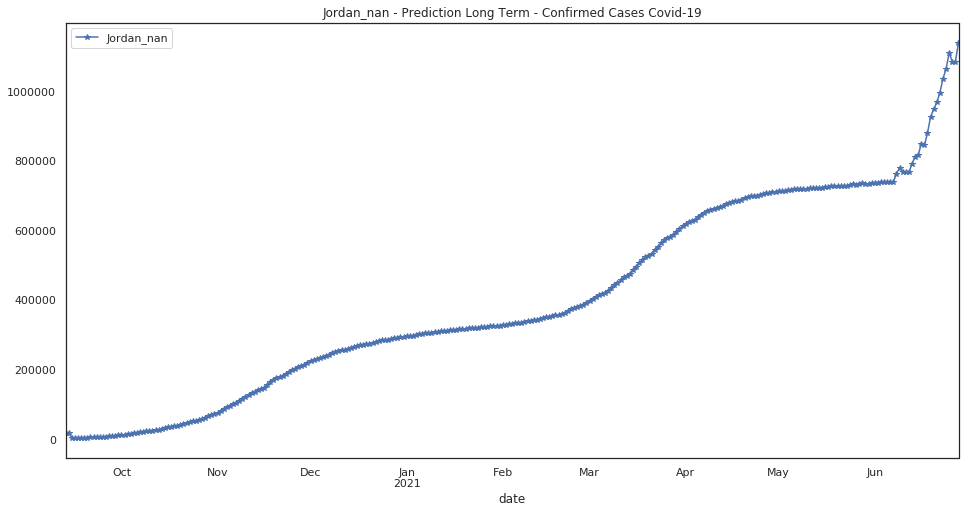

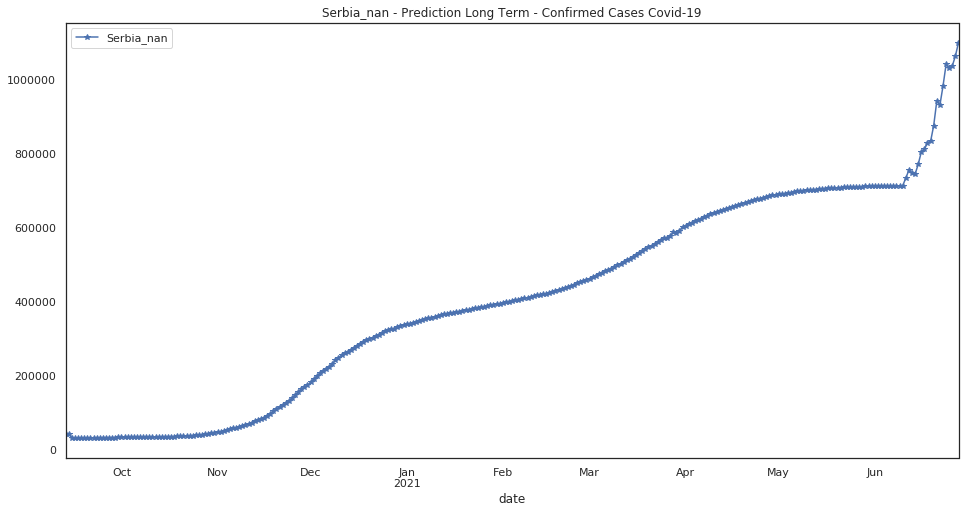

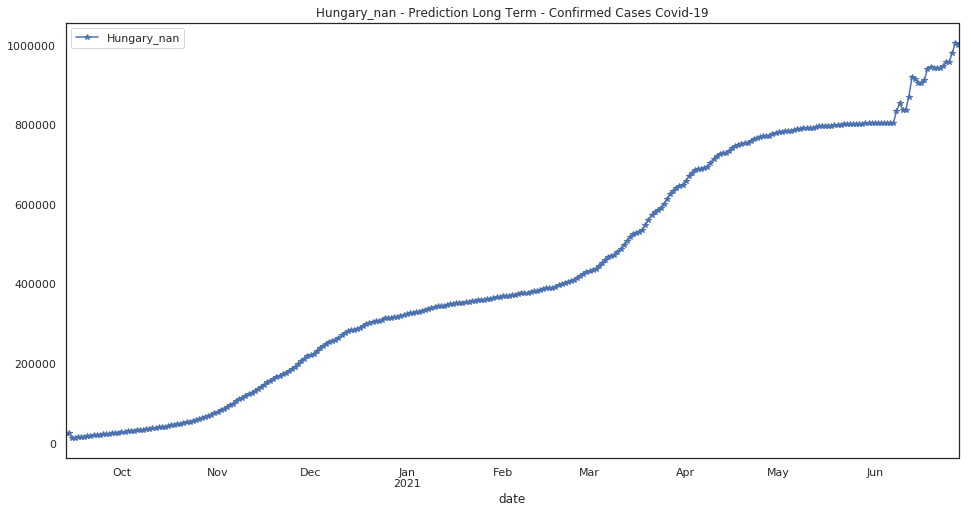

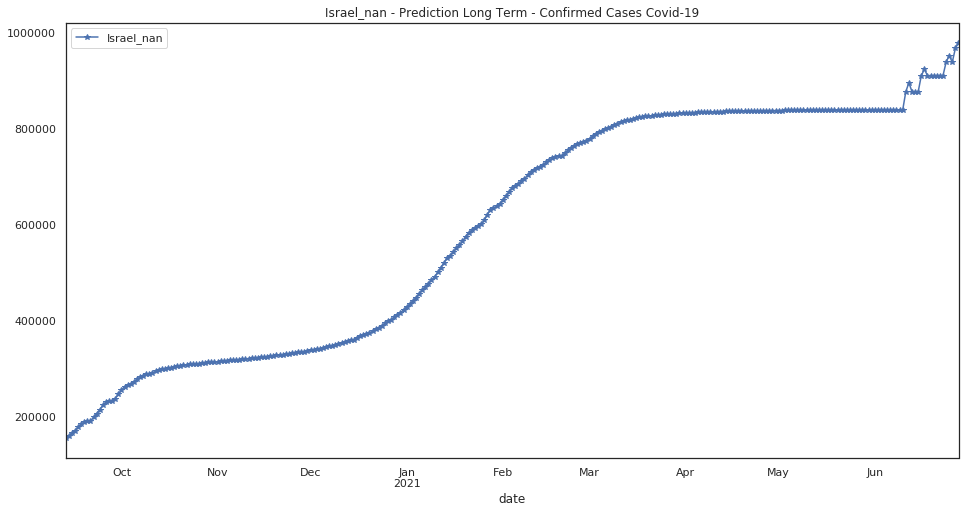

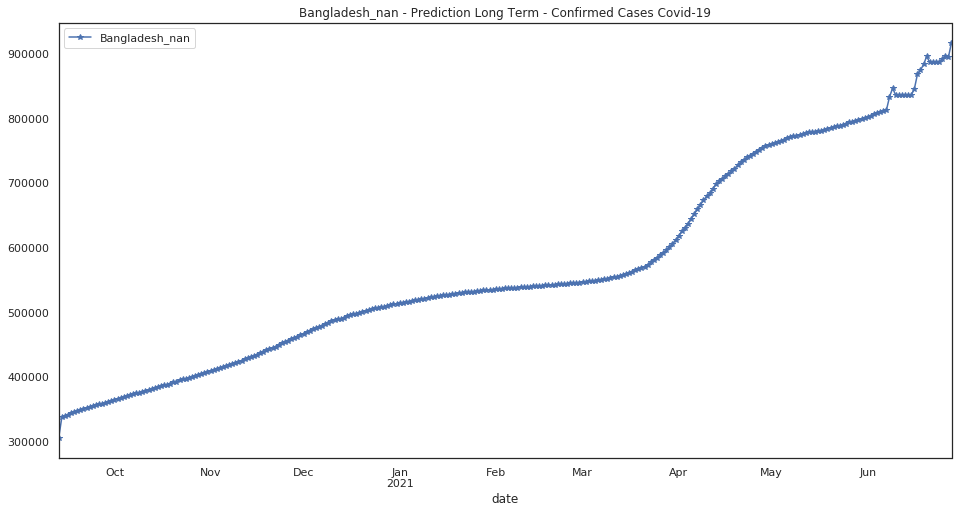

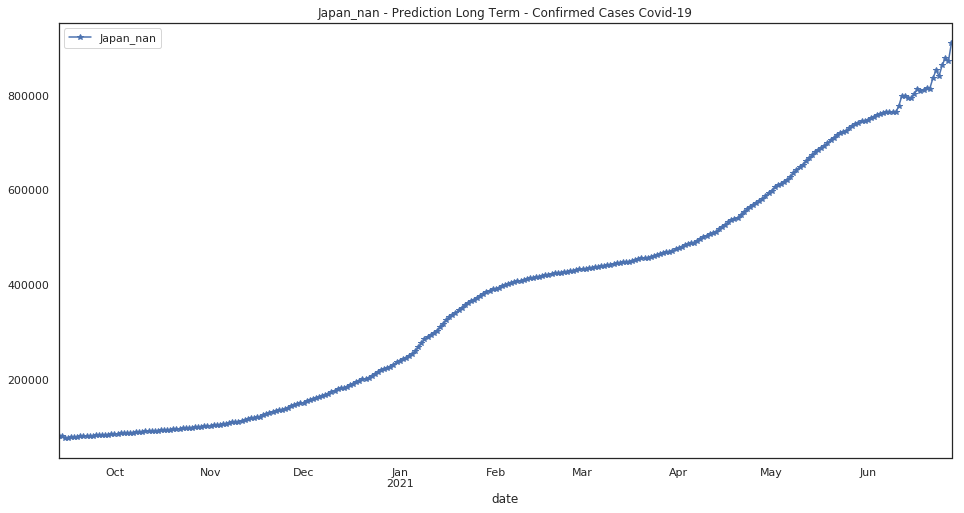

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

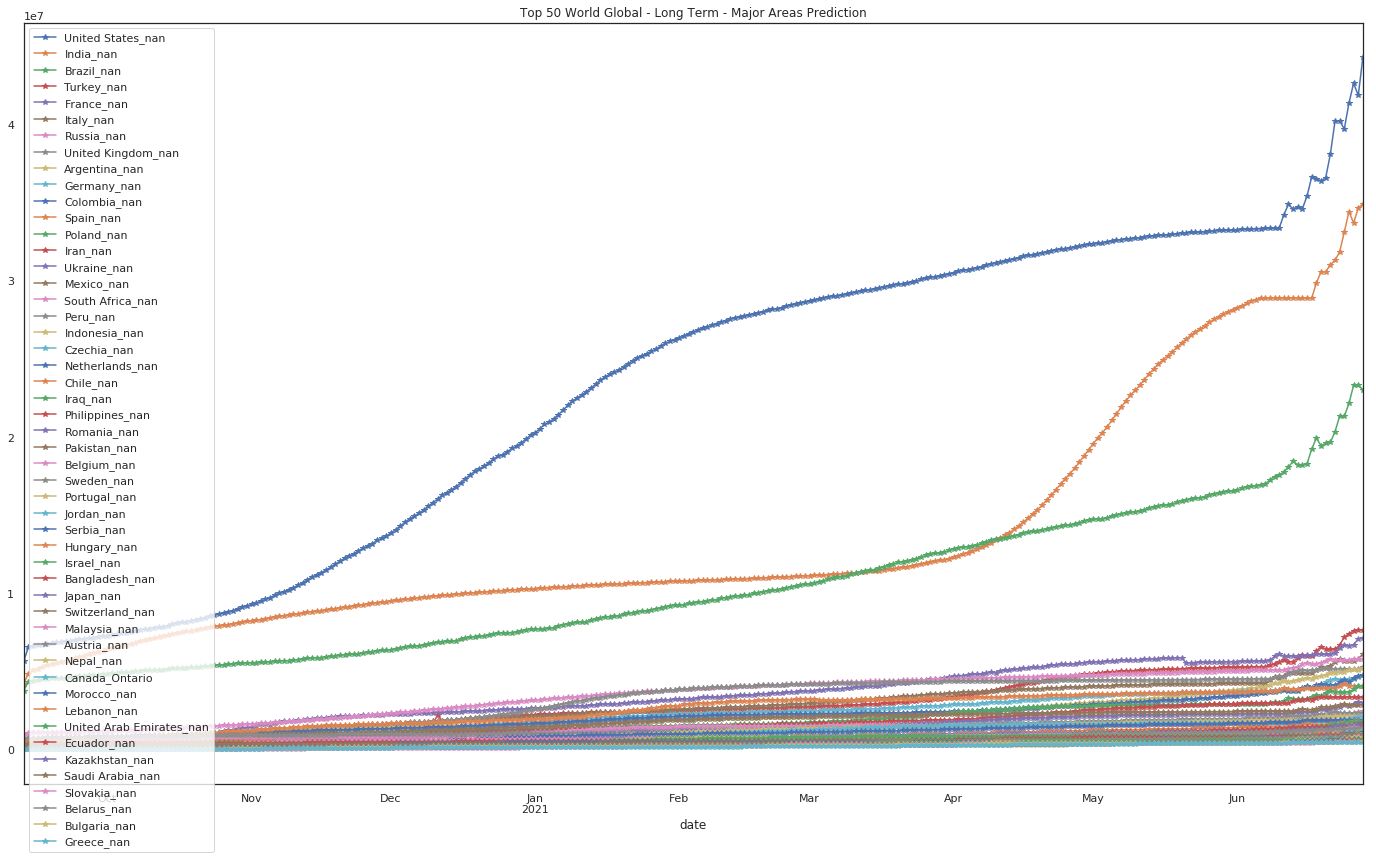

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

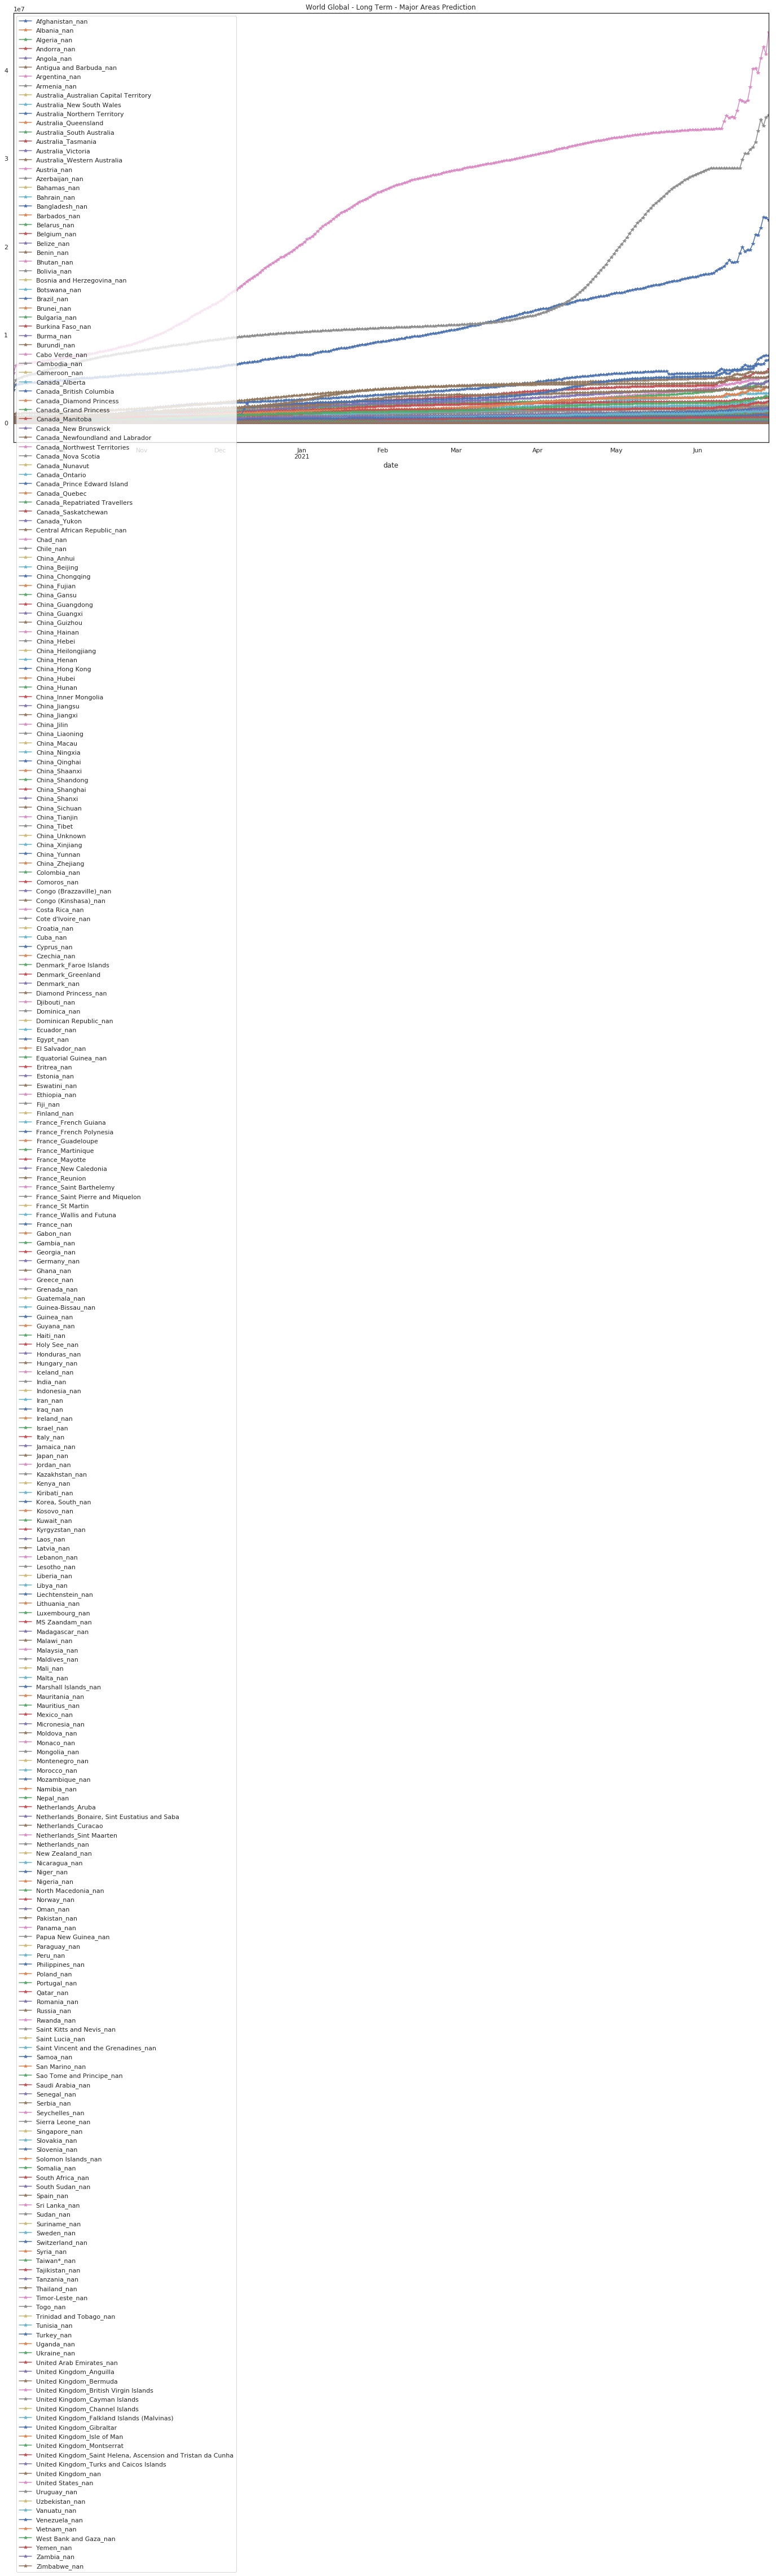

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41234.0      20022.0      57094.0       4498.0   
2020-10-29          41366.0      20296.0      57411.0       4533.0   
2020-10-30          41443.0      20622.0      57726.0       4701.0   
2020-10-31          41520.0      20867.0      58024.0       4665.0   
2020-11-01          41597.0      21199.0      58335.0       4756.0   
2020-11-02          41713.0      21505.0      58648.0       4879.0   
2020-11-03          41826.0      21879.0      59028.0       4905.0   
2020-11-04          41909.0      22276.0      59584.0       5114.0   
2020-11-05          42027.0      22698.0      60253.0       5045.0   
2020-11-06          42082.0      23180.0      60919.0       5135.0   
2020-11-07          42123.0      23668.0      61504.0       5464.0   
2020-11-08          42241.0      24169.0      62130.0       5319.0   
2020-11-09          42382.0      24694.0      62774.0       5439.0   
2020-11-10          42558.0      25243.0      63478.0       5527.0   
2020-11-11          42717.0      25753.0      64300.0       5592.0   
2020-11-12          42893.0      26181.0      65155.0       5567.0   
2020-11-13          43074.0      26659.0      66038.0       5733.0   
2020-11-14          43144.0      27167.0      66883.0       5725.0   
2020-11-15          43305.0      27754.0      67718.0       5983.0   
2020-11-16          43545.0      28373.0      68612.0       5872.0   
2020-11-17          43762.0      29069.0      69598.0       5989.0   
2020-11-18          44013.0      29789.0      70654.0       6076.0   
2020-11-19          44266.0      30570.0      71692.0       6032.0   
2020-11-20          44460.0      31400.0      72779.0       6149.0   
2020-11-21          44593.0      32149.0      73825.0       6168.0   
2020-11-22          44762.0      32733.0      74864.0       6242.0   
2020-11-23          45037.0      33472.0      75890.0       6327.0   
2020-11-24          45255.0      34208.0      76964.0       6367.0   
2020-11-25          45455.0      34866.0      78044.0       6436.0   
2020-11-26          45678.0      35536.0      79085.0       6485.0   
...                     ...          ...          ...          ...   
2021-05-30          70918.0     132377.0     128804.0      13717.0   
2021-05-31          71814.0     132385.0     129001.0      13744.0   
2021-06-01          73055.0     132401.0     129255.0      13730.0   
2021-06-02          74111.0     132422.0     129707.0      13770.0   
2021-06-03          75199.0     132429.0     130103.0      13773.0   
2021-06-04          76628.0     132440.0     130457.0      13779.0   
2021-06-05          78088.0     132444.0     130803.0      13782.0   
2021-06-06          79312.0     132445.0     131045.0      13783.0   
2021-06-07          80826.0     132451.0     131340.0      13798.0   
2021-06-08          84126.0     138066.0     131386.0      13791.0   
2021-06-09          85215.0     141571.0     131283.0      13804.0   
2021-06-10          84318.0     139022.0     131283.0      13805.0   
2021-06-11          89563.0     140738.0     136761.0      13802.0   
2021-06-12          92402.0     144553.0     142344.0      13802.0   
2021-06-13          92816.0     145895.0     145944.0      14041.0   
2021-06-14          94276.0     144784.0     150205.0      14053.0   
2021-06-15          93517.0     145662.0     148832.0      14387.0   
2021-06-16          97061.0     148318.0     148161.0      14370.0   
2021-06-17         100822.0     153874.0     154976.0      14415.0   
2021-06-18         100299.0     156481.0     160743.0      14686.0   
2021-06-19         103545.0     154396.0     158468.0      14684.0   
2021-06-20         105168.0     154396.0     159450.0      14707.0   
2021-06-21         104232.0     154396.0     164397.0      14723.0   
2021-06-22         104633.0     157105.0     166633.0      14684.0   
2021-06-23

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
252                                    Timor-Leste_nan  -8.874217  125.727539   
253                                           Togo_nan   8.619500    0.824800   
254                            Trinidad and Tobago_nan  10.691800  -61.222500   
255                                        Tunisia_nan  33.886917    9.537499   
256                                         Turkey_nan  38.963700   35.243300   
257                                  United States_nan  40.000000 -100.000000   
258                                         Uganda_nan   1.373333   32.290275   
259                                        Ukraine_nan  48.379400   31.165600   
260                           United Arab Emirates_nan  23.424076   53.847818   
261                            United Kingdom_Anguilla  18.220600  -63.068600   
262                             United Kingdom_Bermuda  32.307800  -64.750500   
263              United Kingdom_British Virgin Islands  18.420700  -64.640000   
264                      United Kingdom_Cayman Islands  19.313300  -81.254600   
265                     United Kingdom_Channel Islands  49.372300   -2.364400   
266         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
267                           United Kingdom_Gibraltar  36.140800   -5.353600   
268                         United Kingdom_Isle of Man  54.236100   -4.548100   
269                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      59                 Chile_nan -35.675100  -71.543000   
9      94              Colombia_nan   4.570900  -74.297300   
10    103               Czechia_nan  49.817500   15.473000   
11    111               Ecuador_nan  -1.831200  -78.183400   
12    132                France_nan  46.227600    2.213700   
13    137               Germany_nan  51.165691   10.451526   
14    139                Greece_nan  39.074200   21.824300   
15    149               Hungary_nan  47.162500   19.503300   
16    151                 India_nan  20.593684   78.962880   
17    152             Indonesia_nan  -0.789300  113.921300   
18    153                  Iran_nan  32.427908   53.688046   
19    154                  Iraq_nan  33.223191   43.679291   
20    156                Israel_nan  31.046051   34.851612   
21    157                Israel_nan  31.046051   34.851612   
22    158                 Italy_nan  41.871940   12.567380   
23    160                 Japan_nan  36.204824  138.252924   
24    161                Jordan_nan  31.240000   36.510000   
25    162            Kazakhstan_nan  48.019600   66.923700   
26    171               Lebanon_nan  33.854700   35.862300   
27    172               Lebanon_nan  33.854700   35.862300   
28    182              Malaysia_nan   4.210484  101.975766   
29    189                Mexico_nan  23.634500 -102.552800   
30    195               Morocco_nan  31.791700   -7.092600   
31    198                 Nepal_nan  28.166700   84.250000   
32    203           Netherlands_nan  52.132600    5.291300   
33    211              Pakistan_nan  30.375300   69.345100   
34    215                  Peru_nan  -9.190000  -75.015200   
35    216           Philippines_nan  12.879721  121.774017   
36    217                Poland_nan  51.919400   19.145100   
37    218              Portugal_nan  39.399900   -8.224500   
38    220               Romania_nan  45.943200   24.966800   
39    221                Russia_nan  61.524010  105.318756   
40    229          Saudi Arabia_nan  23.885942   45.079162   
41    231                Serbia_nan  44.016500   21.005900   
42    235              Slovakia_nan  48.669000   19.699000   
43    239          South Africa_nan -30.559500   22.937500   
44    241                 Spain_nan  40.463667   -3.749220   
45    245                Sweden_nan  60.128161   18.643501   
46    246           Switzerland_nan  46.818200    8.227500   
47    256                Turkey_nan  38.963700   35.243300   
48    257         United States_nan  40.000000 -100.000000   
49    259               Ukraine_nan  48.379400   31.165600   
50    260  United Arab Emirates_nan  23.424076   53.847818   
51    272        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              494100.0             555537.0             578704.0   
1               43201.0              43531.0              33541.0   
2              305915.0             337520.0             339903.0   
3               78603.0              78765.0              74360.0   
4               95247.0              95981.0              94306.0   
5             3752482.0            4330455.0            4382318.0   
6               30046.0              30169.0              18061.0   
7               54704.0              55066.0              46905.0   
8              389839.0             434748.0             436779.0   
9              632882.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()